<a href="https://colab.research.google.com/github/fabriziobasso/kaggle/blob/main/S3E26_Models.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **S3E26 Cirrosys - KAGGLE Competition**
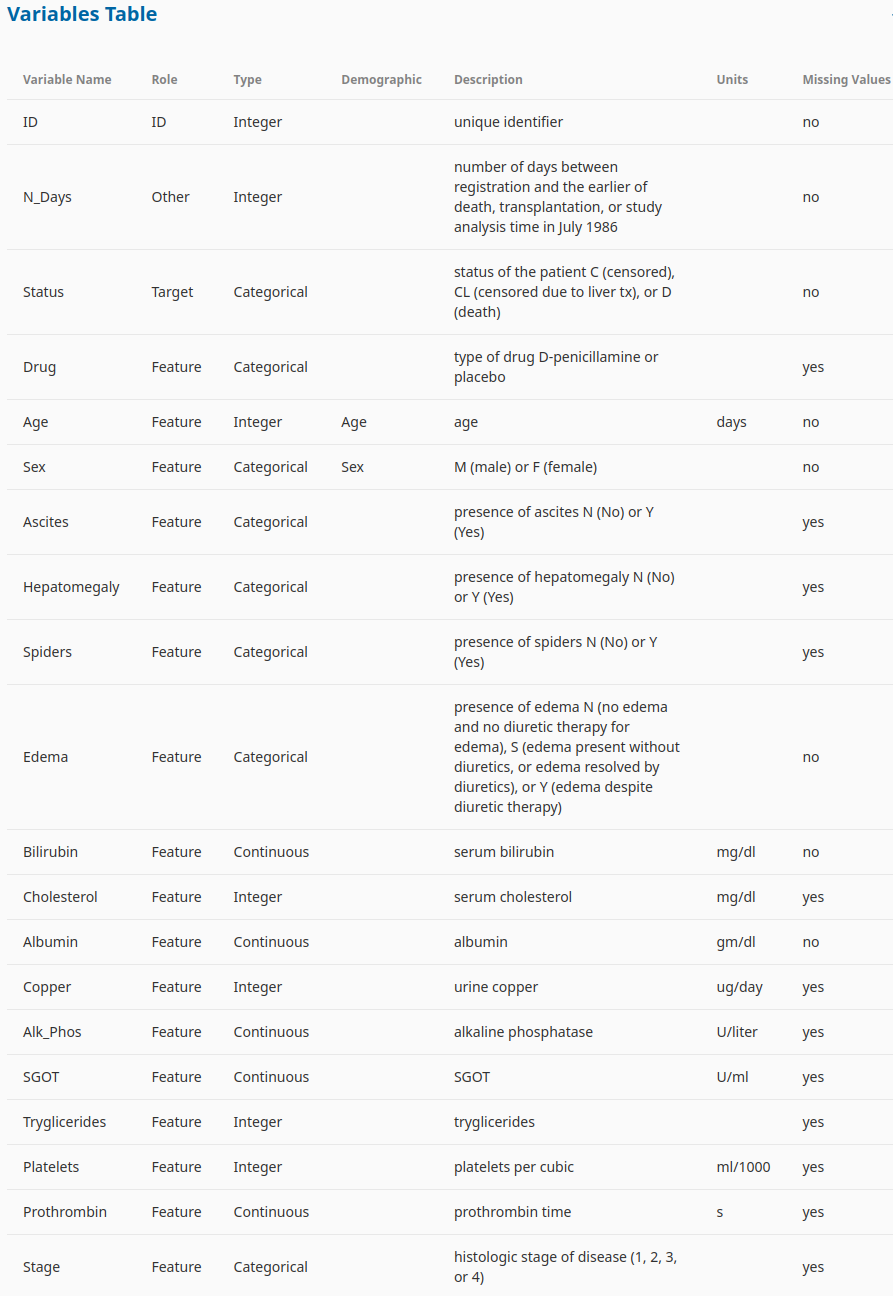
Evaluation
Submissions are evaluated using the multi-class logarithmic loss. Each id in the test set had a single true class label, Status. For each id, you must submit a set of predicted probabilities for each of the three possible outcomes, e.g., Status_C, Status_CL, and Status_D.

The metric is calculated


where
 is the number of rows in the test set,
 is the number of outcomes (i.e., 3),  
 is the natural logarithm,
 is 1 if row
 has the ground truth label
 and 0 otherwise, and
 is the predicted probability that observation
 belongs to class
.

The submitted probabilities for a given row are not required to sum to one because they are rescaled prior to being scored (each row is divided by the row sum). In order to avoid the extremes of the log function, predicted probabilities are replaced with
.

#### **Files:**
* train.csv - the training dataset; Hardness is the continuous target
* test.csv - the test dataset; your objective is to predict the value of Hardness
* sample_submission.csv - a sample submission file in the correct format
* Mineral_Dataset_Supplementary_Info.csv - Original Dataset

## 1.0 Workbook Set-up and Libraries:

#### 1.0 Libraries

In [140]:
%%capture
!pip install tensorflow-addons
#!pip install shap
#!pip install eli5
#!pip install tf-nightly
#!pip install -U scikit-learn==1.2.0
#!pip install catboost
#!pip install haversine
#!pip install pytorch-forecasting
!pip install umap-learn
#!pip install reverse_geocoder
#!pip install --upgrade protobuf
!pip install colorama
!pip install imbalanced-learn
!pip install optuna
!pip install optuna-integration
#!pip install pygam
!pip install keras-tuner --upgrade
#!pip install pycaret
#!pip install lightning==2.0.1
!pip install keras-nlp
#!pip install MiniSom

In [141]:
#importing modules

import warnings
warnings.filterwarnings('ignore')
import time
t = time.time()

print('Importing started...')

# basic moduele
import os
import numpy as np
import pandas as pd
import re
#from scipy import stats
from random import randint
import random
import math
import os
import gc
import pickle
from glob import glob
from IPython import display as ipd
from tqdm import tqdm
from datetime import datetime
from joblib import dump, load
import sklearn as sk
from imblearn.over_sampling import SMOTE, RandomOverSampler
from functools import partial
import itertools
import joblib
from itertools import combinations
import IPython
import statsmodels.api as sm
import IPython.display

# visualization moduels
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.gridspec as gridspec
import matplotlib.patches as mpatches
from matplotlib_venn import venn2_unweighted
import seaborn as sns
import missingno as msno
import imblearn
import scipy.stats as stats
from scipy.special import boxcox, boxcox1p


# Palette Setup
colors = ['#FB5B68','#FFEB48','#2676A1','#FFBDB0',]
colormap_0 = mpl.colors.LinearSegmentedColormap.from_list("",colors)
palette_1 = sns.color_palette("coolwarm", as_cmap=True)
palette_2 = sns.color_palette("YlOrBr", as_cmap=True)
palette_3 = sns.light_palette("red", as_cmap=True)
palette_4 = sns.color_palette("viridis", as_cmap=True)
palette_5 = sns.color_palette("rocket", as_cmap=True)
palette_6 = sns.color_palette("GnBu", as_cmap=True)
palette_7 = sns.color_palette("tab20c", as_cmap=False)
palette_8 = sns.color_palette("Set2", as_cmap=False)

palette_custom = ['#fbb4ae','#b3cde3','#ccebc5','#decbe4','#fed9a6','#ffffcc','#e5d8bd','#fddaec','#f2f2f2']
palette_9 = sns.color_palette(palette_custom, as_cmap=False)

sns.set_style("whitegrid",{"grid.linestyle":"--", 'grid.linewidth':0.2, 'grid.alpha':0.5})
#sns.set_theme(style="ticks", context="notebook")
sns.despine(left=True, bottom=True, top=False, right=False)

mpl.rcParams['axes.spines.left'] = True
mpl.rcParams['axes.spines.right'] = False
mpl.rcParams['axes.spines.top'] = False
mpl.rcParams['axes.spines.bottom'] = True

# Style Import
from colorama import Style, Fore
red = Style.BRIGHT + Fore.RED
blu = Style.BRIGHT + Fore.BLUE
mgt = Style.BRIGHT + Fore.MAGENTA
gld = Style.BRIGHT + Fore.YELLOW
res = Style.RESET_ALL

# preprocessing modules
from sklearn.model_selection import (train_test_split,
                                     KFold,
                                     StratifiedKFold,
                                     cross_val_score,
                                     GroupKFold,
                                     GridSearchCV,
                                     RepeatedStratifiedKFold)

from sklearn.preprocessing import (LabelEncoder,
                                   StandardScaler,
                                   MinMaxScaler,
                                   OrdinalEncoder,
                                   RobustScaler,
                                   PowerTransformer,
                                   OneHotEncoder,
                                   LabelEncoder,
                                   OrdinalEncoder,
                                   QuantileTransformer,
                                   PolynomialFeatures)

from sklearn.decomposition import PCA
from sklearn.compose import ColumnTransformer

from sklearn.feature_selection import SelectFromModel
from sklearn.preprocessing import FunctionTransformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


# metrics
from sklearn.metrics import (mean_squared_error,
                             r2_score,
                             mean_absolute_error,
                             mean_absolute_percentage_error,
                             classification_report,
                             confusion_matrix,
                             ConfusionMatrixDisplay,
                             multilabel_confusion_matrix,
                             accuracy_score,
                             roc_auc_score,
                             auc,
                             roc_curve,
                             log_loss)


# modeling algos
from sklearn.linear_model import (LogisticRegression,
                                  Lasso,
                                  ridge_regression,
                                  LinearRegression,
                                  Ridge,
                                  RidgeCV,
                                  ElasticNet,
                                  BayesianRidge,
                                  TweedieRegressor,
                                  ARDRegression,
                                  PoissonRegressor,
                                  GammaRegressor)

from sklearn.neighbors import KNeighborsRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.isotonic import IsotonicRegression

from sklearn.ensemble import (AdaBoostRegressor,
                              RandomForestRegressor,
                              RandomForestClassifier,
                              VotingRegressor,
                              GradientBoostingRegressor,
                              StackingRegressor,
                              HistGradientBoostingClassifier,
                              ExtraTreesClassifier)

from sklearn.base import BaseEstimator, TransformerMixin

# Other Models
#from pygam import LogisticGAM, s, te
import xgboost as xgb
from xgboost import XGBRegressor, XGBClassifier
import lightgbm as lgb
from lightgbm import (LGBMRegressor,
                      LGBMClassifier,
                      early_stopping,
                      record_evaluation,
                      log_evaluation)

#import catboost as cat
#from catboost import CatBoost, CatBoostRegressor
#from catboost import CatBoostClassifier

#from catboost.utils import get_roc_curve

from lightgbm import early_stopping
# check installed version
#import pycaret
warnings.filterwarnings("ignore")
#from minisom import MiniSom

from sklearn.base import clone ## sklearn base models for stacked ensemble model
from sklearn.calibration import CalibratedClassifierCV, CalibrationDisplay

#Interpretiability of the model
#import shap
#import eli5
#from eli5.sklearn import PermutationImportance


## miss
from sklearn.pipeline import (make_pipeline,
                              Pipeline)


import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import tensorflow.keras.backend as K
import tensorflow_addons as tfa
from keras.utils import FeatureSpace
import keras_nlp

# Import libraries for Hypertuning
import kerastuner as kt
from kerastuner.tuners import RandomSearch, GridSearch, BayesianOptimization
# Model Tuning tools:
import optuna
from optuna.integration import TFKerasPruningCallback
from optuna.trial import TrialState
from optuna.visualization import plot_intermediate_values
from optuna.visualization import plot_optimization_history
from optuna.visualization import plot_param_importances
from optuna.visualization import plot_contour
%matplotlib inline
SEED = 1984
N_SPLITS = 10

print('Done, All the required modules are imported. Time elapsed: {} sec'.format(time.time()-t))

Importing started...
Done, All the required modules are imported. Time elapsed: 0.03179049491882324 sec


<Figure size 640x480 with 0 Axes>

In [142]:
# Check Versions:
print("CHECK VERSIONS:")
print(f"sns: {sns.__version__}")
print(f"mpl: {mpl.__version__}")
print(f"tensorflow: {tf.__version__}")
print(f"pandas: {pd.__version__}")
print(f"numpy: {np.__version__}")
print(f"scikit-learn: {sk.__version__}")
print(f"statsmodels: {sm.__version__}")
print(f"missingno: {msno.__version__}")
#print(f"TF-addon: {tfa.__version__}")
print(f"Inbalance_Learning: {imblearn.__version__}")
print(f"XGBoost: {xgb.__version__}")
#print(f"CatBoost: {cat.__version__}")
#print(f"PyCaret: {pycaret.__version__}")

CHECK VERSIONS:
sns: 0.12.2
mpl: 3.7.1
tensorflow: 2.15.0
pandas: 1.5.3
numpy: 1.23.5
scikit-learn: 1.2.2
statsmodels: 0.14.0
missingno: 0.5.2
Inbalance_Learning: 0.10.1
XGBoost: 2.0.2


### **1.1 Utility Functions**

#### Graph Functions:

In [143]:
def summary(df):
    print(f'data shape: {df.shape}')
    summ = pd.DataFrame(df.dtypes, columns=['data type'])
    summ['#missing'] = df.isnull().sum().values
    summ['%missing'] = df.isnull().sum().values / len(df)* 100
    summ['#unique'] = df.nunique().values
    desc = pd.DataFrame(df.describe(include='all').transpose())
    summ['min'] = desc['min'].values
    summ['max'] = desc['max'].values
    summ['median'] = desc['50%'].values
    return summ


def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(15, 5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette='viridis', ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}')
        ax.set_xlabel(x_var)
        ax.set_ylabel(y_var)

    plt.tight_layout()
    plt.show()

def scatter_corr_plot(data_set=None, variables=None, target=None):
    if data_set is None or variables is None or target is None:
        raise ValueError("Please provide data_set and variables.")

    target = target

    full_features = data_set.columns.tolist()
    num_var = [column for column in data_set.columns if data_set[column].nunique() > 10]
    cat_var = [column for column in data_set.columns if data_set[column].nunique() < 10]


    num_rows = len(num_var)
    num_cols = 3

    total_plots = num_rows*num_cols
    plt.figure(figsize=(14,num_rows*2.5))

    for idx, col in enumerate(num_var):
        plt.subplot(num_rows, num_cols, idx % total_plots + 1)
        sns.scatterplot(x=col, y=target, data=data_set, color='#82B0D2',s=10)

        sns.regplot(x=col, y=target, data=data_set, scatter=False, color='#FA7F6F')

        corr_coef = data_set[target].corr(data_set[col])
        plt.text(0.95, 0.95, f"Corr: {corr_coef:.2f}", transform=plt.gca().transAxes, ha='right', va='top')
        mean_value = data_set[col].mean()

        plt.axvline(x=mean_value, color='black', linestyle='--', linewidth=1, label='Mean Value')
        plt.title(f"{col} : {target}")

    plt.tight_layout()
    plt.show()

def correlation_plot(data_train=None, data_test=None, variables=None):
    if data_train is None or data_test is None or variables is None:
        raise ValueError("Please provide data_train, data_test and variables.")
    corr_matrix_train = data_train[variables].corr()
    corr_matrix_test = data_test[variables].corr()

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(16, 10), gridspec_kw={'width_ratios': [0.80, 1.0]})
    sns.heatmap(corr_matrix_train, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[0], cbar = False)
    axes[0].set_title('Train Set', fontsize=15)

    sns.heatmap(corr_matrix_test, annot=True, cmap=palette_1, fmt='.2f', linewidths=1, square=True, annot_kws={"size": 9}, ax=axes[1], yticklabels=False, cbar = True, cbar_kws={"shrink": .50})
    axes[1].set_title('Test Set', fontsize=15)

    plt.suptitle('Correlation Matrices of Train and Test Sets', fontsize=25, weight = 'bold',y=0.9)
    for ax in axes:
        ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
    plt.subplots_adjust(top=1)
    plt.tight_layout()
    plt.show()

def scatter_plot_high_corr_pair(data_set=None, target=None, variable_pairs=None):
    num_pairs = len(variable_pairs)

    num_rows = (num_pairs + 2) // 3
    num_cols = min(num_pairs, 3)

    fig = plt.figure(figsize=(10, 3.5 * num_rows))
    spec = gridspec.GridSpec(num_rows, num_cols, width_ratios=[1]*num_cols, height_ratios=[1]*num_rows)

    for i, pair in enumerate(variable_pairs):
        x_var, y_var = pair
        row_index = i // 3
        col_index = i % 3

        ax = plt.subplot(spec[row_index, col_index])

        sns.scatterplot(x=x_var, y=y_var, hue=target, data=data_set, palette="viridis", ax=ax, s=10)
        sns.regplot(x=x_var, y=y_var, data=data_set, scatter=False, color='#FA7F6F', ax=ax)

        ax.set_title(f'{x_var} vs {y_var}', fontsize=10)
        ax.set_xlabel(x_var, fontsize=7)
        ax.set_ylabel(y_var, fontsize=7)

    plt.tight_layout()
    plt.show()

def plot_boxplot_and_hist(data, variable):
   #figure composed of two matplotlib.Axes objects (ax_box and ax_hist)
   f, (ax_box, ax_hist) = plt.subplots( 2, 1, sharex =False, gridspec_kw ={"height_ratios": (0.50, 0.85)}, figsize=(8,4))
   # assigning a graph to each ax
   sns.boxplot( x = data[variable], ax = ax_box)
   sns.histplot( data = data, x = variable, ax = ax_hist, bins=40)
   # Remove x axis name for the boxplot
   ax_box.set( xlabel ='')
   ax_box.set_title(variable)
   plt.tight_layout()


def diagnostic_plots( df, variable):
  plt.figure( figsize =(8,3))
  plt.subplot( 1, 2, 1)
  df[variable].hist( bins = 30)
  plt.title( f" Histogram of {variable}")
  plt.subplot( 1, 2, 2)
  stats.probplot( df[ variable], dist ="norm", plot = plt)
  plt.title( f" Q-Q plot of {variable}")
  plt.show()
  plt.tight_layout()

#### Data Analysis Functions

In [144]:
def adversarial_validation(data_train, data_test, target='Hardness',is_train_test="True"):

    adv_train = data_train.drop(target, axis = 1)
    adv_test = data_test.copy()
    if is_train_test==False:
      adv_test = adv_test.drop(target, axis = 1)

    adv_train['is_test'] = 0
    adv_test['is_test'] = 1
    adv = pd.concat([adv_train, adv_test], ignore_index = True)
    adv_shuffled = adv.sample(frac = 1)

    adv_X = adv_shuffled.drop('is_test', axis = 1)
    adv_y = adv_shuffled['is_test']

    skf = StratifiedKFold(n_splits = 5, random_state = 42, shuffle = True)

    val_scores = []
    predictions = np.zeros(len(adv))

    for fold, (train_idx, val_idx) in enumerate(skf.split(adv_X, adv_y)):
        adv_lr = XGBClassifier(random_state = 42)
        adv_lr.fit(adv_X.iloc[train_idx], adv_y.iloc[train_idx])

        val_preds = adv_lr.predict_proba(adv_X.iloc[val_idx])[:,1]
        predictions[val_idx] = val_preds
        val_score = roc_auc_score(adv_y.iloc[val_idx], val_preds)
        val_scores.append(val_score)

    fpr, tpr, _ = roc_curve(adv['is_test'], predictions)

    plt.figure(figsize = (6, 6))
    sns.lineplot(x=[0, 1], y=[0, 1], linestyle="--", label="Indistinguishable Datasets")
    sns.lineplot(x=fpr, y=tpr, label="Adversarial Validation Classifier")
    plt.title(f'Train-Test Validation = {np.mean(val_scores):.5f}', weight = 'bold', size = 17)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.show()

def search_high_corr_pairs(data_set = None, variables =None, threshold = 0.7):
    corr_matrix=data_set[variables].corr()
    high_corr_pairs=[]

    for i in range(len(corr_matrix.columns)):
        for j in range(i+1,len(corr_matrix.columns)):
            if abs(corr_matrix.iloc[i,j]) > threshold:
                print(f'\033[91m{corr_matrix.columns[i]}\033[0m and \033[91m{corr_matrix.columns[j]}\033[0m are highly linearly correlated, indicating the possibility of collinearity.')
                high_corr_pairs.append((corr_matrix.columns[i],corr_matrix.columns[j]))
    return high_corr_pairs


def transform_features(train,test):
  train_ = train.copy()
  test_ = test.copy()

  feat_log_transf = ["allelectrons_Total","density_Total","allelectrons_Average","atomicweight_Average",
                     "ionenergy_Average","zaratio_Average","density_Average"]

  feat_power_transf = ["val_e_Average","R_vdw_element_Average","el_neg_chi_Average"]

  log_transformer = FunctionTransformer(lambda x: np.log(x+1.0))
  power_transformer = FunctionTransformer(lambda x: np.power(x,2.0))

  for feat in feat_log_transf:
    train_[feat] = log_transformer.transform(train_[feat])
    test_[feat] = log_transformer.transform(test_[feat])

  for feat in feat_power_transf:
    train_[feat] = power_transformer.transform(train_[feat])
    test_[feat] = power_transformer.transform(test_[feat])

  return train_, test_


def replace_zeros(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_.replace({0:np.nan},inplace=True)
  test_.replace({0:np.nan},inplace=True)

  train_["nan_marker"] = train_.isna().any(axis=1).astype("int")
  test_["nan_marker"] = test_.isna().any(axis=1).astype("int")

  total = pd.concat([train_, test_], ignore_index=True)
  total.drop("Hardness",axis=1,inplace=True)

  total_col = list(total.columns)

  imputer = IterativeImputer(estimator=BayesianRidge(), max_iter=50, random_state = 0)
  imputer.fit(total[total_col])
  train_[total_col] = imputer.transform(train_[total_col])
  test_[total_col] = imputer.transform(test_[total_col])

  return train_, test_

def clip_values(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_["allelectrons_Total"] = train_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)
  test_["allelectrons_Total"] = test_["allelectrons_Total"].clip(lower=1.9, upper=None, axis=None, inplace=False)

  train_["allelectrons_Average"] = train_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)
  test_["allelectrons_Average"] = test_["allelectrons_Average"].clip(lower=1.7, upper=None, axis=None, inplace=False)

  train_["val_e_Average"] = train_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["val_e_Average"] = test_["val_e_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["atomicweight_Average"] = train_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)
  test_["atomicweight_Average"] = test_["atomicweight_Average"].clip(lower=2.0, upper=None, axis=None, inplace=False)

  train_["density_Total"] = train_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)
  test_["density_Total"] = test_["density_Total"].clip(lower=0.01, upper=None, axis=None, inplace=False)

  train_["el_neg_chi_Average"] = train_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)
  test_["el_neg_chi_Average"] = test_["el_neg_chi_Average"].clip(lower=1.0, upper=None, axis=None, inplace=False)

  train_["R_vdw_element_Average"] = train_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)
  test_["R_vdw_element_Average"] = test_["R_vdw_element_Average"].clip(lower=1.2, upper=None, axis=None, inplace=False)

  train_["R_cov_element_Average"] = train_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)
  test_["R_cov_element_Average"] = test_["R_cov_element_Average"].clip(lower=0.2,upper=2.0,axis=None,inplace=False)

  train_["zaratio_Average"] = train_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)
  test_["zaratio_Average"] = test_["zaratio_Average"].clip(lower=0.3,upper=0.60, axis=None, inplace=False)

  train_["density_Average"] = train_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)
  test_["density_Average"] = test_["density_Average"].clip(lower=0.01,upper=None, axis=None, inplace=False)

  train_["ionenergy_Average"] = train_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)
  test_["ionenergy_Average"] = test_["ionenergy_Average"].clip(lower=2.1,upper=None, axis=None, inplace=False)


  return train_, test_

def prepare_dataset(train,test):
  train_ = train.copy()
  test_ = test.copy()

  train_,test_ = transform_features(train_,test_)
  train_,test_ = replace_zeros(train_,test_)
  train_,test_ = clip_values(train_,test_)

  return train_, test_


def plot_training_session(history):
  # Plot training and validation loss scores
  # against the number of epochs.
  plt.figure(figsize=(8, 6))
  plt.plot(history.history['loss'], label='Train')
  plt.plot(history.history['val_loss'], label='Validation')
  plt.grid(linestyle='--')
  plt.ylabel('val_loss')
  plt.xlabel('Epoch')
  plt.title('Train-Validation Scores', pad=13)
  plt.legend(loc='upper right');
  plt.show()

In [145]:
def make_dataframe(arr, cols):
    """
    This function builts the dataframe.

    Parameters
    ----------
    `arr`: array of 2 dimension
    `cols`: column names

    Returns a dataframe.
    """
    df = pd.DataFrame(data=arr, columns=cols)
    return df

def plot_heatmap(matrix, title, labels):
    """
    This function plots the heatmap.

    Parameters
    ----------
    `matrix`: 2D array
    `title`: title
    `labels`: integer encoded target values

    Returns none.
    """
    sns.heatmap(data=matrix, annot=True, fmt='.2f', linewidths=0.1,
                xticklabels=labels, yticklabels=labels)
    plt.xlabel(xlabel='Predicted Class')
    plt.ylabel(ylabel='Actual Class')
    plt.title(label=title, fontsize=10)

def plot_confusion_matrix(y_true, y_pred, labels):
    """
    This function plots:
        1. Confusion matrix
        2. Precision matrix
        3. Recall matrix

    Parameters
    ----------
    `y_true`: ground truth (or actual) values
    `y_pred`: predicted values
    `labels`: integer encoded target values

    Returns none.
    """
    cmat = confusion_matrix(y_true=y_true, y_pred=y_pred, labels=labels)
    pmat = cmat / cmat.sum(axis=0)
    print("Column sum of precision matrix: {}".format(pmat.sum(axis=0)))
    rmat = ((cmat.T) / (cmat.sum(axis=1).T)).T
    print("Row sum of recall matrix:       {}".format(rmat.sum(axis=1)))

    plt.figure(figsize=(15, 3))
    plt.subplot(131)
    plot_heatmap(matrix=cmat, title='Confusion Matrix', labels=labels)
    plt.subplot(132)
    plot_heatmap(matrix=pmat, title='Precision Matrix', labels=labels)
    plt.subplot(133)
    plot_heatmap(matrix=rmat, title='Recall Matrix', labels=labels)
    plt.show()

#### NN Functions

**ResNet**

In [193]:
class dense_residual_block(tf.keras.layers.Layer):
    def __init__(self, units, dropout_rate=0.25, activation="relu", kr=0, attention=False, name="drb"):   #tf.keras.regularizers.L2(l2=0.01)
        super(dense_residual_block, self).__init__()
        self.units = units

        self.linear_dense = tf.keras.layers.Dense(units, name=f"lin_dense_0_{name}")
        self.project = tf.keras.layers.Dense(units, name=f"lin_dense_prj_{name}")

        self.batchnorm_0 = tf.keras.layers.BatchNormalization(name=f"bn_0_{name}")
        self.batchnorm_1 = tf.keras.layers.BatchNormalization(name=f"bn_1_{name}")
        self.batchnorm_prj = tf.keras.layers.BatchNormalization(name=f"bn_prj_{name}")
        self.dropout = tf.keras.layers.Dropout(dropout_rate,name=f"do_0_{name}")
        self.layer_norm = tf.keras.layers.BatchNormalization(name=f"bn_2_{name}") #LayerNormalization()
        self.add_layer = tf.keras.layers.Add(name=f"add_0_{name}")

        self.attention=attention
        self.attention_layer = tf.keras.layers.Attention(name=f"attention_{name}")

        if activation=="gelu":
          self.activation_0 = tf.keras.activations.gelu
          self.activation_1 = tf.keras.activations.gelu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="relu":
          self.activation_0 = tf.keras.activations.relu
          self.activation_1 = tf.keras.activations.relu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="elu":
          self.activation_0 = tf.keras.activations.elu
          self.activation_1 = tf.keras.activations.elu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="swish":
          self.activation_0 = tf.keras.activations.swish
          self.activation_1 = tf.keras.activations.swish
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="selu":
          self.activation_0 = tf.keras.activations.selu
          self.activation_1 = tf.keras.activations.selu
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="lecun_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="leaky_relu":
          self.activation_0 = tf.keras.layers.LeakyReLU()
          self.activation_1 = tf.keras.layers.LeakyReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")
        if activation=="prelu":
          self.activation_0 = tf.keras.layers.PReLU()
          self.activation_1 = tf.keras.layers.PReLU()
          self.dense_0 = tf.keras.layers.Dense(units, kernel_initializer="he_normal", kernel_regularizer = tf.keras.regularizers.L2(l2=kr), name=f"dense_0_{name}")

    def call(self, inputs):

        if self.attention==True:
          attention = self.attention_layer([x, x])
        else:
          attention = inputs

        x = self.dense_0(attention)
        x = self.batchnorm_0(x)
        x = self.activation_0(x)
        x = self.dropout(x)

        x = self.linear_dense(x)
        x = self.batchnorm_1(x)

        if attention.shape[-1] != self.units:
            inputs = self.project(attention)
            inputs = self.batchnorm_prj(inputs)

        return self.add_layer([x, inputs])


def create_mlp(hidden_units, dropout_rate, activation, normalization_layer, name=None):
    mlp_layers = []
    if activation=="relu":
        activation_0 = tf.keras.activations.relu
    if activation=="prelu":
        activation_0 = tf.keras.layers.PReLU()
    if activation=="elu":
        activation_0 = tf.keras.activations.elu
    if activation=="swish":
        activation_0 = tf.keras.activations.swish
    if activation=="selu":
        activation_0 = tf.keras.activations.selu
    if activation=="leaky_relu":
        activation_0 = tf.keras.layers.LeakyReLU()
    if activation=="gelu":
        activation_0 = tf.keras.activations.gelu

    for units in hidden_units:
        mlp_layers.append(normalization_layer()),
        if activation == "selu":
          mlp_layers.append(layers.Dense(units, activation=activation_0, kernel_initializer="lecun_normal"))
          mlp_layers.append(layers.AlphaDropout(dropout_rate))
        else:
          mlp_layers.append(layers.Dense(units, activation=activation_0))
          mlp_layers.append(layers.Dropout(dropout_rate))

    return keras.Sequential(mlp_layers, name=name)

### **1.2 Connect Drives**

In [146]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

/bin/bash: line 1: nvidia-smi: command not found


Connect to Google Drive:

In [147]:
%%capture
# Connect to Colab:
from google.colab import drive
drive.mount('/content/drive')

In [148]:
folder_data = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S3E26_Cyrrosis"
models_folders = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis"
folders_nn = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis/neural_networks/"
folders_trees = "/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis/trees_models/"

list_directories = [folder_data,models_folders,folders_nn,folders_trees]

for path in list_directories:
  try:
      os.mkdir(path)
  except OSError as error:
      print(f"{path} already exists")

os.chdir(folder_data)

/content/drive/MyDrive/Exercises/Studies_Structured_Data/Data/S3E26_Cyrrosis already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis/neural_networks/ already exists
/content/drive/MyDrive/Exercises/Studies_Structured_Data/Models/S3E26_Cyrrosis/trees_models/ already exists


## **6.0 Models:**

In [149]:
X_train = pd.read_csv("new_train.csv", index_col=0)
X_test = pd.read_csv("new_test.csv", index_col=0)

X_train["weights"] = X_train["Status"]
X_test["weights"] = 1.0

strat_feature = X_train["Status"]

X_train.drop(columns=["id","Status"],inplace=True)
X_test.drop(columns=["id","Status"],inplace=True)

num_var = X_train.select_dtypes("float").columns
cat_var = X_train.select_dtypes("int").columns

X_train[num_var]=X_train[num_var].astype("float32")
X_train[cat_var]=X_train[cat_var].astype("int32")

X_test[num_var]=X_test[num_var].astype("float32")
X_test[cat_var]=X_test[cat_var].astype("int32")

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8181 entries, 0 to 311
Data columns (total 41 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug                            8181 non-null   int32  
 1   Sex                             8181 non-null   int32  
 2   Ascites                         8181 non-null   int32  
 3   Hepatomegaly                    8181 non-null   int32  
 4   Spiders                         8181 non-null   int32  
 5   Edema                           8181 non-null   int32  
 6   Bilirubin                       8181 non-null   float32
 7   Cholesterol                     8181 non-null   float32
 8   Albumin                         8181 non-null   float32
 9   Copper                          8181 non-null   float32
 10  Alk_Phos                        8181 non-null   float32
 11  SGOT                            8181 non-null   float32
 12  Tryglicerides                   818

In [150]:
X_train[["Status_C","Status_CL","Status_D"]].sum()

Status_C     5112
Status_CL     293
Status_D     2776
dtype: int64

In [151]:
weight_for_C = (1 / 5112) * (8181.0 / 3.0)
weight_for_CL = (1 / 293) * (8181.0 / 3.0)
weight_for_D = (1 / 2776) * (8181.0 / 3.0)

class_weight = {"C": weight_for_C, "CL": weight_for_CL, "D": weight_for_D}
X_train["weights"] = X_train["weights"].replace(class_weight)
X_train["weights"] = X_train["weights"].astype("float32")
X_test["weights"] = X_test["weights"].astype("float32")

weight_for_C,weight_for_CL,weight_for_D

(0.5334507042253521, 9.30716723549488, 0.9823487031700288)

In [152]:
summary(X_train).style.background_gradient(cmap='Reds')

data shape: (8181, 41)


In [153]:
summary(X_test).style.background_gradient(cmap='Reds')

data shape: (5271, 41)


In [154]:
def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe[["Status_C","Status_CL","Status_D"]]
    dataframe = dataframe.drop(columns=["Status_C","Status_CL","Status_D"])
    weights = dataframe.pop("weights")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels, weights))
    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [155]:
train_ds = dataframe_to_dataset(X_train,batch_size=32)
test_ds = dataframe_to_dataset(X_test,batch_size=32)

In [156]:
train_ds_with_no_labels = train_ds.map(lambda x, *_ : x)

def example_feature_space(dataset, feature_space, feature_names):
    feature_space.adapt(dataset)
    for x in dataset.take(1):
        inputs = {feature_name: x[feature_name] for feature_name in feature_names}
        preprocessed_x = feature_space(inputs)
        print(f"Input: {[{k:v.numpy()} for k, v in inputs.items()]}")
        print(f"Preprocessed output: {[{k:v.numpy()} for k, v in preprocessed_x.items()]}")

In [157]:
num_var = list(num_var)
cat_var = list(cat_var)
cat_var.remove('Status_C')
cat_var.remove('Status_CL')
cat_var.remove('Status_D')

In [158]:
cat_var,num_var

(['Drug',
  'Sex',
  'Ascites',
  'Hepatomegaly',
  'Spiders',
  'Edema',
  'Stage',
  'count_disease',
  'Age_binned',
  'N_Days_binned',
  'Prothrombin_binned',
  'Bilirubin_binned',
  'Albumin_binned',
  'Cholesterol_binned',
  'Copper_binned',
  'Alk_Phos_binned',
  'SGOT_binned',
  'Tryglicerides_binned',
  'Platelets_binned',
  'bill_proh_binned',
  'all_tests',
  'all_tests_aged',
  'all_tests_aged_days',
  'all_tests_aged_days_ills',
  'all_tests_aged_days_ills_alt',
  'all_tests_aged_days_ills_stage'],
 ['Bilirubin',
  'Cholesterol',
  'Albumin',
  'Copper',
  'Alk_Phos',
  'SGOT',
  'Tryglicerides',
  'Platelets',
  'Prothrombin',
  'Bil_Prot',
  'min_class_feat_RF'])

In [159]:
feature_space_dict = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float_normalized() for a in num_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  crosses=[FeatureSpace.cross(feature_names=("count_disease","bill_proh_binned"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="dict"
                                  )

feature_space_conc = FeatureSpace(
                                  features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float_normalized() for a in num_var}},
                                  # Specify feature cross with a custom crossing dim.
                                  crosses=[FeatureSpace.cross(feature_names=("count_disease","bill_proh_binned"), crossing_dim=10, output_mode="one_hot")],
                                  output_mode="concat"
                                  )

In [160]:
%%time
train_ds_with_no_labels = train_ds.map(lambda x, *_: x)
feature_space_dict.adapt(train_ds_with_no_labels)
feature_space_conc.adapt(train_ds_with_no_labels)

CPU times: user 1min 23s, sys: 1.98 s, total: 1min 25s
Wall time: 1min 49s


In [161]:
for x, y, w in train_ds.take(1):
    preprocessed_x = feature_space_conc(x)
    print("preprocessed_x.shape:", preprocessed_x.shape)
    print("preprocessed_x.dtype:", preprocessed_x.dtype)
    print("preprocessed_y.shape:", y.shape)
    print("preprocessed_w.shape:", w.shape)

preprocessed_x.shape: (32, 120)
preprocessed_x.dtype: <dtype: 'float32'>
preprocessed_y.shape: (32, 3)
preprocessed_w.shape: (32,)


In [162]:
preprocessed_train_ds_dict = train_ds.map(lambda x, y, w: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds_dict = test_ds.map(lambda x, y, w: (feature_space_dict(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

preprocessed_train_ds_conc = train_ds.map(lambda x, y, w: (feature_space_conc(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds_conc = test_ds.map(lambda x, y, w: (feature_space_conc(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [163]:
for x, y in preprocessed_train_ds_conc.take(1):
    print("preprocessed_x.shape:", x.shape)
    print("y.dtype:", y.shape)

preprocessed_x.shape: (32, 120)
y.dtype: (32, 3)


In [164]:
encoded_features_dict = feature_space_dict.get_encoded_features()
print(encoded_features_dict)

{'Age_binned': <KerasTensor: shape=(None, 8) dtype=float32 (created by layer 'category_encoding_28')>, 'Albumin': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_33_preprocessor')>, 'Albumin_binned': <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_29')>, 'Alk_Phos': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_35_preprocessor')>, 'Alk_Phos_binned': <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'category_encoding_30')>, 'Ascites': <KerasTensor: shape=(None, 2) dtype=float32 (created by layer 'category_encoding_31')>, 'Bil_Prot': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_40_preprocessor')>, 'Bilirubin': <KerasTensor: shape=(None, 1) dtype=float32 (created by layer 'float_normalized_31_preprocessor')>, 'Bilirubin_binned': <KerasTensor: shape=(None, 3) dtype=float32 (created by layer 'category_encoding_32')>, 'Cholesterol': <KerasTensor: 

### 6.1 Baseline:

In [ ]:
def create_baseline_model(fs,name="baseline_model",learning_rate = 0.001,
                          activation="relu",gn_noise=0.0,dropout=0.5,hidden_layers=3,
                          units_0=256,units_1=256,):

  encoded_features_conc = fs.get_encoded_features()

  x = tf.keras.layers.Dense(units_0, activation=activation, name="dense_in")(encoded_features_conc)
  x = tf.keras.layers.BatchNormalization(name="bn_in")(x)
  x = tf.keras.layers.Dropout(dropout,name="do_in")(x)

  x = tf.keras.layers.GaussianNoise(stddev=gn_noise, name="gsn")(x)

  for lr in range(hidden_layers):
    x = tf.keras.layers.Dense(units_1, activation=activation, name=f"dense_{lr}")(x)
    x = tf.keras.layers.BatchNormalization(name=f"bn_{lr}")(x)
    x = tf.keras.layers.Dropout(dropout,name=f"do_{lr}")(x)

  output = tf.keras.layers.Dense(3, activation="softmax",name="output_final")(x)

  model = tf.keras.Model(inputs=encoded_features_conc, outputs=output, name=name)

  model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
          loss=tf.keras.losses.CategoricalCrossentropy(name="cat_ce"),
          metrics=[keras.metrics.AUC(curve="PR")],
          weighted_metrics=[])

  return model

In [ ]:
model = create_baseline_model(feature_space_conc)
model.summary()

Model: "baseline_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 120)]             0         
                                                                 
 dense_in (Dense)            (None, 256)               30976     
                                                                 
 bn_in (BatchNormalization)  (None, 256)               1024      
                                                                 
 do_in (Dropout)             (None, 256)               0         
                                                                 
 gsn (GaussianNoise)         (None, 256)               0         
                                                                 
 dense_0 (Dense)             (None, 256)               65792     
                                                                 
 bn_0 (BatchNormalization)   (None, 256)            

#### 6.1.1 KerasTuner

In [ ]:
X_trn, X_val = train_test_split(X_train, random_state=2023, test_size=0.3)

feature_space = FeatureSpace(
                            features={**{a:FeatureSpace.integer_categorical(num_oov_indices=0, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float_normalized() for a in num_var}},
                            # Specify feature cross with a custom crossing dim.
                            crosses=[FeatureSpace.cross(feature_names=("count_disease","bill_proh_binned"), crossing_dim=10, output_mode="one_hot")],
                            output_mode="concat"
                            )

train_dataset = dataframe_to_dataset(X_trn, batch_size=32, shuffle=True)
valid_dataset = dataframe_to_dataset(X_val, batch_size=32, shuffle=False)

train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
feature_space.adapt(train_ds_with_no_labels)

preprocessed_train_ds = train_dataset.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_valid_ds = valid_dataset.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

In [ ]:
# Define the hyperparameter search space: EXPERIMENT 1
hp = kt.HyperParameters()
hp.Choice('gn_noise', values=[0.01, 0.025])
hp.Choice('dropout', values=[0.33, 0.50])
hp.Choice('units_0', values=[256, 512])
hp.Choice('hidden_layers', values=[2, 3, 4])
hp.Choice('units_1', values=[64, 128, 256])
hp.Choice('activation', values=['swish', 'gelu', 'relu']);

In [ ]:
# TRAIN MODEL
# Define Preprocessing steps:
def create_turner_model(hp):

  encoded_features_conc = feature_space.get_encoded_features()

  x = tf.keras.layers.Dense(hp.get('units_0'), activation=hp.get('activation'), name="dense_in")(encoded_features_conc)
  x = tf.keras.layers.BatchNormalization(name="bn_in")(x)
  x = tf.keras.layers.Dropout(hp.get('dropout'),name="do_in")(x)

  x = tf.keras.layers.GaussianNoise(stddev=hp.get('gn_noise'), name="gsn")(x)

  for lr in range(hp.get('hidden_layers')):
    x = tf.keras.layers.Dense(hp.get('units_1'), activation=hp.get('activation'), name=f"dense_{lr}")(x)
    x = tf.keras.layers.BatchNormalization(name=f"bn_{lr}")(x)
    x = tf.keras.layers.Dropout(hp.get('dropout'),name=f"do_{lr}")(x)


  output = tf.keras.layers.Dense(3, activation="softmax",name="output_final")(x)

  model = tf.keras.Model(inputs=encoded_features_conc, outputs=output, name="model_tuner")

  model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=0.001),
          loss=tf.keras.losses.CategoricalCrossentropy(name="cat_ce"),
          metrics=[keras.metrics.AUC(curve="PR",name="AUC_PR")],
          weighted_metrics=[])

  return model

In [ ]:
# Create a tuner and search for the best hyperparameters
tuner = BayesianOptimization(create_turner_model,
                             objective="val_loss",
                             hyperparameters=hp, max_trials=40, overwrite=True)

stop_early = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)
reduce_ = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5, min_lr=0.00001)

tuner.search(preprocessed_train_ds, validation_data=preprocessed_valid_ds, epochs=51,callbacks=[stop_early,reduce_])

Trial 40 Complete [00h 01m 19s]
val_loss: 0.7690542340278625

Best val_loss So Far: 0.748670756816864
Total elapsed time: 00h 52m 09s


In [ ]:
tuner.get_best_hyperparameters()[0].values

{'gn_noise': 0.0,
 'dropout': 0.5,
 'units_0': 256,
 'hidden_layers': 3,
 'units_1': 256,
 'activation': 'swish'}

#### 6.1.2 Fit Baseline Models:

In [ ]:
model = create_baseline_model(feature_space,
                              name="test_model",
                              learning_rate = 0.001,
                              activation="swish",
                              gn_noise=0.0,
                              dropout=0.5,
                              hidden_layers=3,
                              units_0=256,
                              units_1=256)

1/1 [==============================] - 0s 219ms/step
(32,) (32, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


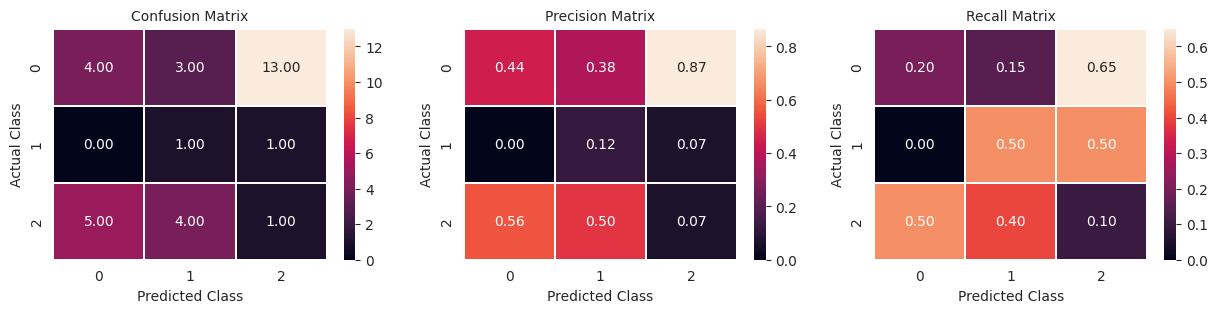


               precision    recall  f1-score   support

           0       0.44      0.20      0.28        20
           1       0.12      0.50      0.20         2
           2       0.07      0.10      0.08        10

    accuracy                           0.19        32
   macro avg       0.21      0.27      0.19        32
weighted avg       0.31      0.19      0.21        32



In [ ]:
for x,y,z in preprocessed_train_ds.take(1):
  eval = model.predict(x)

eval = eval.argmax(axis=1)
#eval = tf.expand_dims(tf.math.argmax(eval,-1),axis=-1)
target = tf.expand_dims(tf.math.argmax(y,axis=1),axis=-1)
print(eval.shape,target.shape)
plot_confusion_matrix(target, eval, labels=[0,1,2])

print("\n",classification_report(y_true=target, y_pred=eval))

**Experiment Run Function**

In [ ]:
X_train.columns

Index(['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders', 'Edema',
       'Bilirubin', 'Cholesterol', 'Albumin', 'Copper', 'Alk_Phos', 'SGOT',
       'Tryglicerides', 'Platelets', 'Prothrombin', 'Stage', 'count_disease',
       'Status_C', 'Status_CL', 'Status_D', 'Age_binned', 'N_Days_binned',
       'Prothrombin_binned', 'Bilirubin_binned', 'Albumin_binned',
       'Cholesterol_binned', 'Copper_binned', 'Alk_Phos_binned', 'SGOT_binned',
       'Tryglicerides_binned', 'Platelets_binned', 'Bil_Prot',
       'bill_proh_binned', 'all_tests', 'all_tests_aged',
       'all_tests_aged_days', 'all_tests_aged_days_ills',
       'all_tests_aged_days_ills_alt', 'all_tests_aged_days_ills_stage',
       'min_class_feat_RF', 'weights'],
      dtype='object')

In [ ]:
def run_experiment(train, test_data_file, input_format="concat", experiment_name="model_baseline", splits=5, num_epochs=200, batch_size=32, n_repeats=8, rs=42):

  skf = RepeatedStratifiedKFold(n_splits=splits, n_repeats=n_repeats, random_state=rs)
  test_results_df_C = pd.DataFrame(index=test_data_file.index, columns=list(range(splits*n_repeats)))
  test_results_df_CL = pd.DataFrame(index=test_data_file.index, columns=list(range(splits*n_repeats)))
  test_results_df_D = pd.DataFrame(index=test_data_file.index, columns=list(range(splits*n_repeats)))

  test_results_df = pd.DataFrame(index=test_data_file.index, columns=["Status_C","Status_CL","Status_D"])

  all_logloss = []


  for i, (train_index, valid_index) in enumerate(skf.split(X_train,strat_feature)):

    print(f"\nRunning CV {i}\n")
    # Prepare the Dataset:
    train_data_file = train.iloc[train_index,:]
    val_data_file = train.iloc[valid_index,:]

    train_dataset = dataframe_to_dataset(train_data_file, batch_size=batch_size, shuffle=True)
    valid_dataset = dataframe_to_dataset(val_data_file, batch_size=batch_size, shuffle=False)
    test_dataset = dataframe_to_dataset(test_data_file, batch_size=batch_size, shuffle=False)


    feature_space = FeatureSpace(
                                features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="one_hot") for a in cat_var},**{a:FeatureSpace.float_normalized() for a in num_var}},
                                # Specify feature cross with a custom crossing dim.
                                crosses=[FeatureSpace.cross(feature_names=("count_disease","bill_proh_binned"), crossing_dim=10, output_mode="one_hot")],
                                output_mode=input_format
                                )

    train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
    print("Adapting Features Space....")
    feature_space.adapt(train_ds_with_no_labels)

    preprocessed_train_ds = train_dataset.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_valid_ds = valid_dataset.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
    preprocessed_test_ds = test_dataset.map(lambda x, y, w: (feature_space(x), y, w), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

    # Callbacks:
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor="val_loss", patience=15, restore_best_weights=True, start_from_epoch=5)
    reduce_on_plat = tf.keras.callbacks.ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=0.00001)
    checkpoint_filepath = folders_nn + 'checkpoint/'
    Checkpoint = tf.keras.callbacks.ModelCheckpoint(filepath=checkpoint_filepath,
                                                    save_weights_only=True,
                                                    monitor="val_loss",
                                                    mode='min',
                                                    restore_best_weights=True)

    # Generate Model
    model = create_baseline_model(feature_space,
                                  name=experiment_name,
                                  learning_rate = 0.0005,
                                  activation="swish",
                                  gn_noise=0.0,
                                  dropout=0.5,
                                  hidden_layers=3,
                                  units_0=256,
                                  units_1=256)

    print("Start training the model...")
    history = model.fit(preprocessed_train_ds, epochs=num_epochs, callbacks=[early_stopping,Checkpoint,reduce_on_plat],validation_data=preprocessed_valid_ds)
    print("Model training finished")

    model.load_weights(checkpoint_filepath)
    log_loss, AUC_pr = model.evaluate(preprocessed_valid_ds, verbose=0)

    plot_training_session(history)

    y_hat = model.predict(preprocessed_test_ds)


    eval = model.predict(preprocessed_valid_ds)

    eval = eval.argmax(axis=1)
    y_validation = val_data_file[['Status_C', 'Status_CL', 'Status_D']].values
    #eval = tf.expand_dims(tf.math.argmax(eval,-1),axis=-1)
    target = tf.expand_dims(tf.math.argmax(y_validation,axis=1),axis=-1)
    print(eval.shape,target.shape)
    plot_confusion_matrix(target, eval, labels=[0,1,2])

    print("\n",classification_report(y_true=target, y_pred=eval))
    print(f"y_hat shape:{y_hat.shape}")

    test_results_df_C.iloc[:,i] = y_hat[:,0]
    test_results_df_CL.iloc[:,i] = y_hat[:,1]
    test_results_df_D.iloc[:,i] = y_hat[:,2]

    model.save(f'{folders_nn+experiment_name}/CV_{i}')
    feature_space.save(f"{folders_nn+experiment_name}/CV_{i}/myfeaturespace_{experiment_name}.keras")


    print(f"Test log_loss: {round(log_loss, 2)}%")
    all_logloss.append(round(log_loss, 3))

  test_results_df_C["Mean"] = test_results_df_C.mean(axis=1)
  test_results_df_CL["Mean"] = test_results_df_CL.mean(axis=1)
  test_results_df_D["Mean"] = test_results_df_D.mean(axis=1)

  test_results_df.loc[:,"C"] = test_results_df_C["Mean"].values
  test_results_df.loc[:,"CL"] = test_results_df_CL["Mean"].values
  test_results_df.loc[:,"D"] = test_results_df_D["Mean"].values

  print(f"All Valuation AUC_pr: {AUC_pr}")

  return test_results_df_C,test_results_df_CL,test_results_df_D, test_results_df


Running CV 0

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 58s 23ms/step - loss: 1.4488 - auc_15: 0.5219 - val_loss: 1.0101 - val_auc_15: 0.5952 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 22ms/step - loss: 1.1995 - auc_15: 0.6058 - val_loss: 0.8240 - val_auc_15: 0.7805 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 4s 20ms/step - loss: 1.1033 - auc_15: 0.6376 - val_loss: 0.8078 - val_auc_15: 0.7677 - lr: 5.0000e-04
Epoch 4/200
205/205 [==============================] - 4s 20ms/step - loss: 1.0372 - auc_15: 0.6540 - val_loss: 0.7790 - val_auc_15: 0.7531 - lr: 5.0000e-04
Epoch 5/200
205/205 [==============================] - 3s 14ms/step - loss: 0.9673 - auc_15: 0.6675 - val_loss: 0.7798 - val_auc_15: 0.7461 - lr: 5.0000e-04
Epoch 6/200
205/205 [==============================] - 3s 16ms/step - loss: 0.9180 - auc_15: 0.6874 - val_loss: 0.7652 - val_auc_15: 0.7708 - l

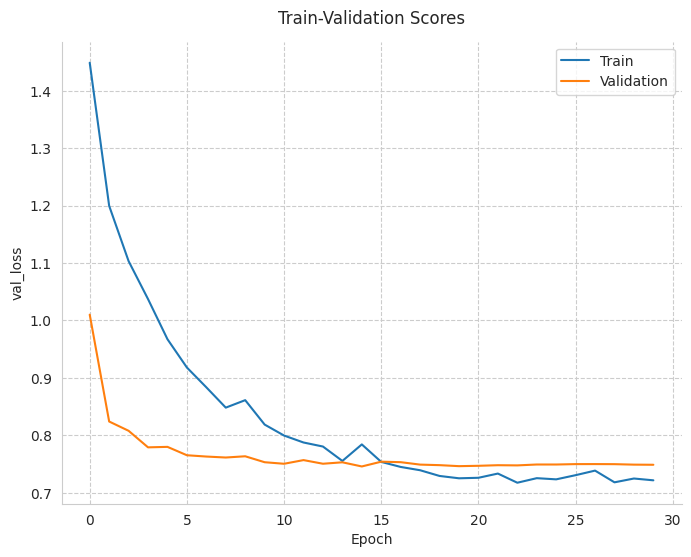

52/52 [==============================] - 1s 4ms/step
(1637,) (1637, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


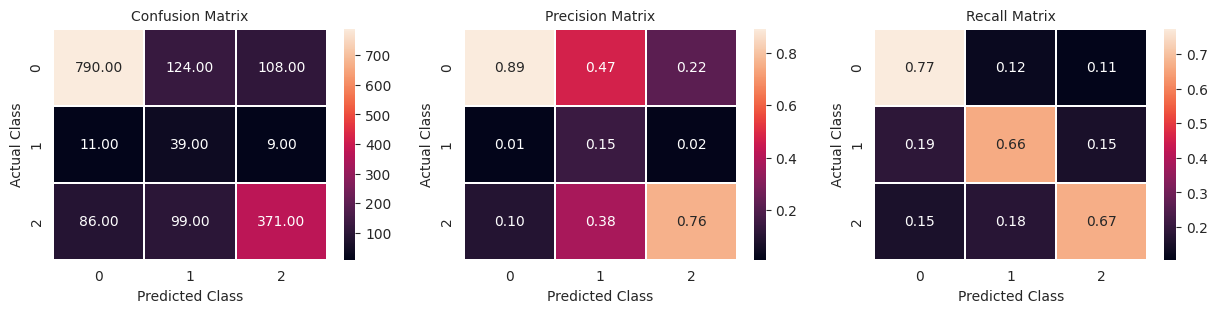


               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1022
           1       0.15      0.66      0.24        59
           2       0.76      0.67      0.71       556

    accuracy                           0.73      1637
   macro avg       0.60      0.70      0.59      1637
weighted avg       0.82      0.73      0.77      1637

y_hat shape:(5271, 3)
Test log_loss: 0.75%

Running CV 1

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 6s 18ms/step - loss: 1.4137 - auc_16: 0.5489 - val_loss: 1.0549 - val_auc_16: 0.4085 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 22ms/step - loss: 1.1275 - auc_16: 0.6316 - val_loss: 0.8777 - val_auc_16: 0.6783 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 3s 13ms/step - loss: 1.0717 - auc_16: 0.6583 - val_loss: 0.8590 - val_auc_16: 0.7341 - lr: 5.0000e-04
Epoch 4/200
205/205 [===========

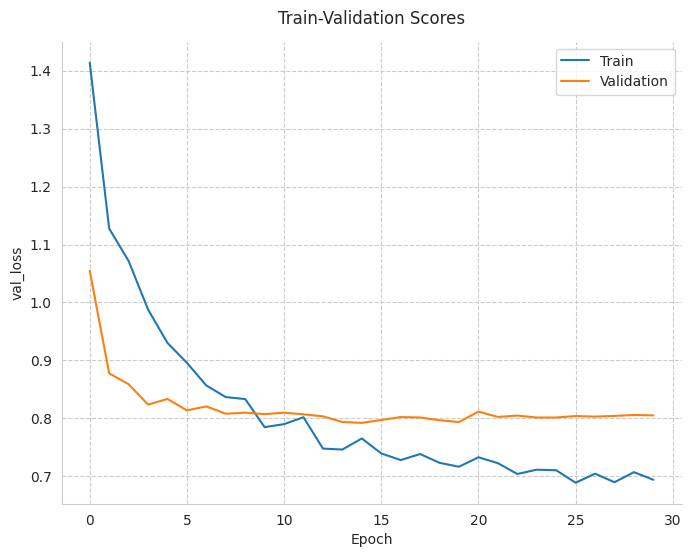

52/52 [==============================] - 1s 4ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


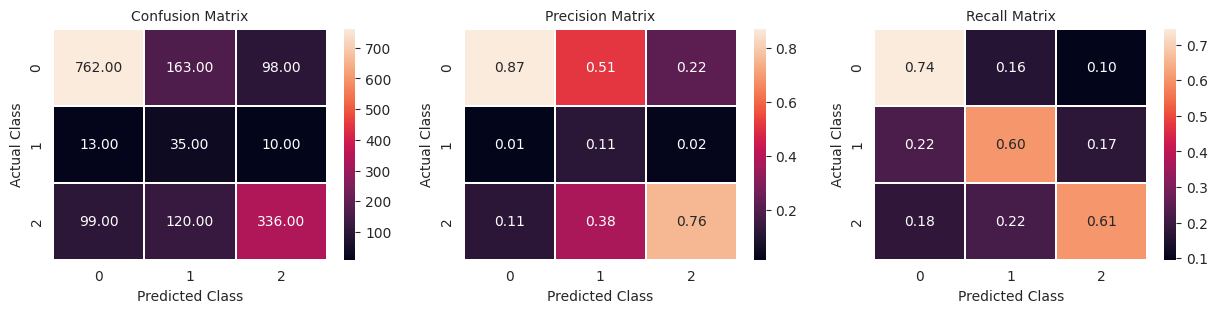


               precision    recall  f1-score   support

           0       0.87      0.74      0.80      1023
           1       0.11      0.60      0.19        58
           2       0.76      0.61      0.67       555

    accuracy                           0.69      1636
   macro avg       0.58      0.65      0.55      1636
weighted avg       0.81      0.69      0.74      1636

y_hat shape:(5271, 3)
Test log_loss: 0.79%

Running CV 2

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 18ms/step - loss: 1.4060 - auc_17: 0.5587 - val_loss: 0.8555 - val_auc_17: 0.6325 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 17ms/step - loss: 1.2058 - auc_17: 0.6313 - val_loss: 0.8122 - val_auc_17: 0.7038 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 4s 20ms/step - loss: 1.0996 - auc_17: 0.6387 - val_loss: 0.7779 - val_auc_17: 0.6853 - lr: 5.0000e-04
Epoch 4/200
205/205 [===========

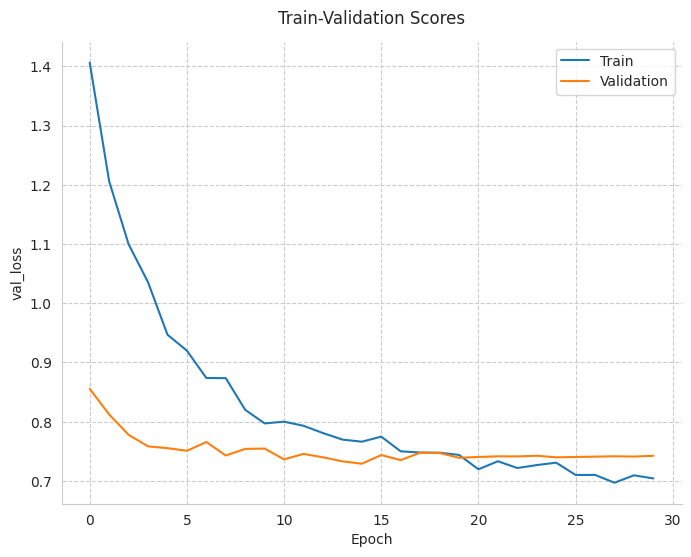

52/52 [==============================] - 1s 4ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


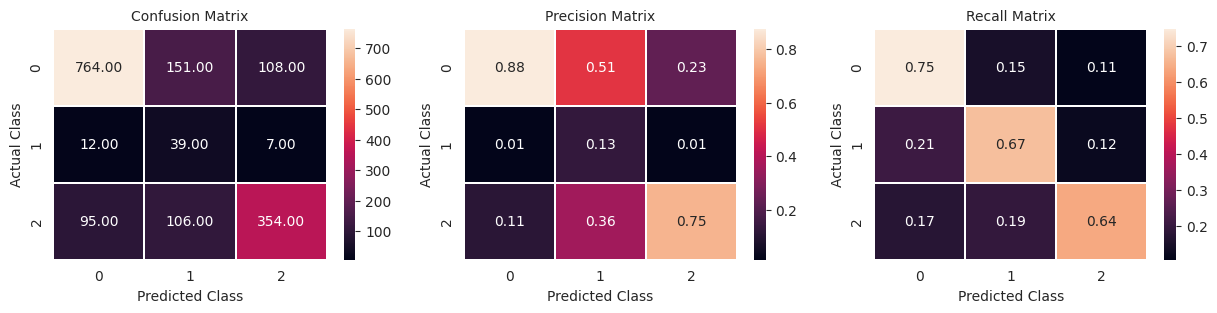


               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1023
           1       0.13      0.67      0.22        58
           2       0.75      0.64      0.69       555

    accuracy                           0.71      1636
   macro avg       0.59      0.69      0.57      1636
weighted avg       0.81      0.71      0.75      1636

y_hat shape:(5271, 3)
Test log_loss: 0.73%

Running CV 3

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 24ms/step - loss: 1.5055 - auc_18: 0.5094 - val_loss: 0.8545 - val_auc_18: 0.7415 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 3s 14ms/step - loss: 1.1486 - auc_18: 0.6124 - val_loss: 0.8208 - val_auc_18: 0.7626 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 3s 13ms/step - loss: 1.0885 - auc_18: 0.6421 - val_loss: 0.8211 - val_auc_18: 0.7437 - lr: 5.0000e-04
Epoch 4/200
205/205 [===========

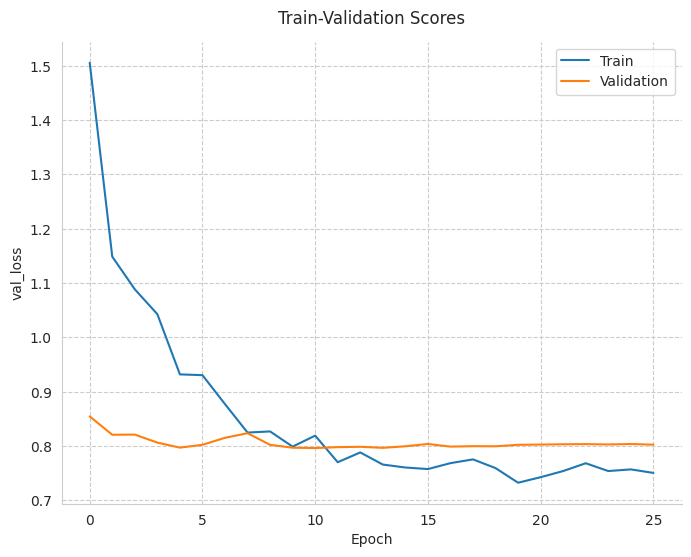

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


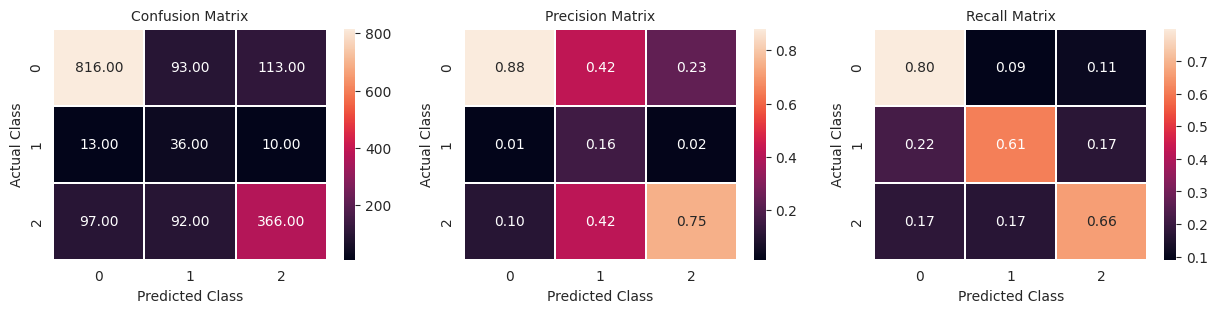


               precision    recall  f1-score   support

           0       0.88      0.80      0.84      1022
           1       0.16      0.61      0.26        59
           2       0.75      0.66      0.70       555

    accuracy                           0.74      1636
   macro avg       0.60      0.69      0.60      1636
weighted avg       0.81      0.74      0.77      1636

y_hat shape:(5271, 3)
Test log_loss: 0.8%

Running CV 4

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 24ms/step - loss: 1.4421 - auc_19: 0.5084 - val_loss: 0.8891 - val_auc_19: 0.7098 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 3s 15ms/step - loss: 1.1776 - auc_19: 0.6065 - val_loss: 0.7466 - val_auc_19: 0.7838 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 3s 14ms/step - loss: 1.1151 - auc_19: 0.6251 - val_loss: 0.7253 - val_auc_19: 0.7810 - lr: 5.0000e-04
Epoch 4/200
205/205 [============

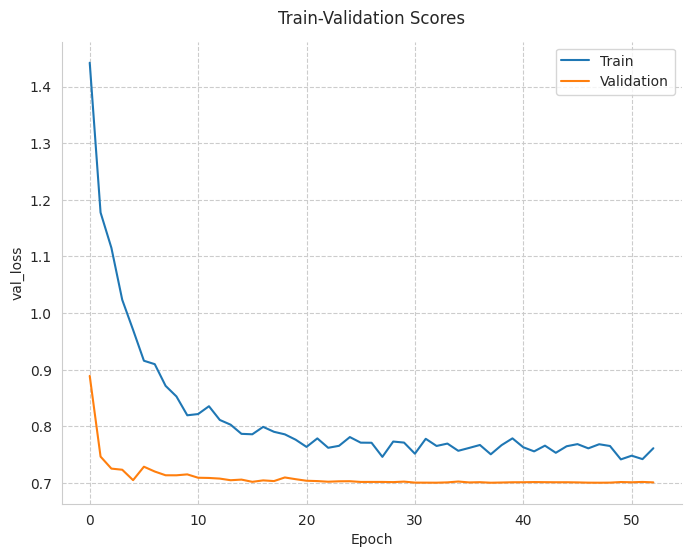

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


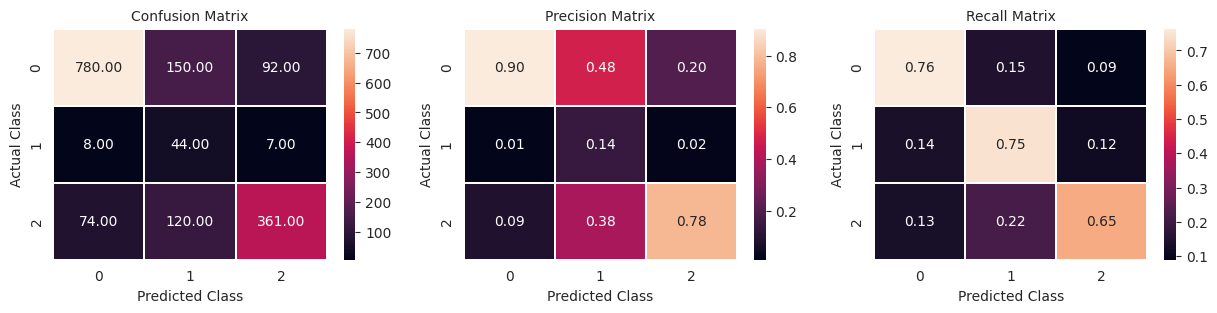


               precision    recall  f1-score   support

           0       0.90      0.76      0.83      1022
           1       0.14      0.75      0.24        59
           2       0.78      0.65      0.71       555

    accuracy                           0.72      1636
   macro avg       0.61      0.72      0.59      1636
weighted avg       0.84      0.72      0.77      1636

y_hat shape:(5271, 3)
Test log_loss: 0.7%

Running CV 5

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 18ms/step - loss: 1.4970 - auc_20: 0.5166 - val_loss: 0.9459 - val_auc_20: 0.6947 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 3s 15ms/step - loss: 1.2327 - auc_20: 0.5959 - val_loss: 0.7578 - val_auc_20: 0.7357 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 23ms/step - loss: 1.1194 - auc_20: 0.6272 - val_loss: 0.7156 - val_auc_20: 0.7783 - lr: 5.0000e-04
Epoch 4/200
205/205 [============

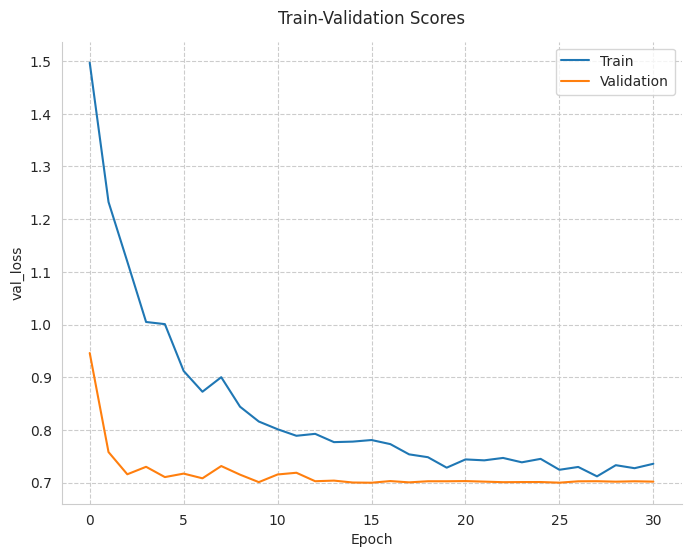

52/52 [==============================] - 1s 4ms/step
(1637,) (1637, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


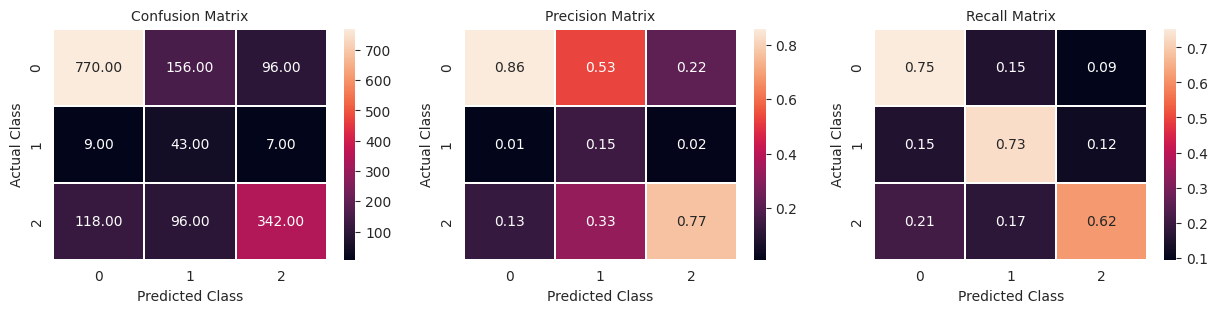


               precision    recall  f1-score   support

           0       0.86      0.75      0.80      1022
           1       0.15      0.73      0.24        59
           2       0.77      0.62      0.68       556

    accuracy                           0.71      1637
   macro avg       0.59      0.70      0.58      1637
weighted avg       0.80      0.71      0.74      1637

y_hat shape:(5271, 3)
Test log_loss: 0.7%

Running CV 6

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 6s 17ms/step - loss: 1.4492 - auc_21: 0.5366 - val_loss: 0.9500 - val_auc_21: 0.5483 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 22ms/step - loss: 1.2154 - auc_21: 0.6083 - val_loss: 0.8333 - val_auc_21: 0.6809 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 22ms/step - loss: 1.0805 - auc_21: 0.6320 - val_loss: 0.7984 - val_auc_21: 0.7929 - lr: 5.0000e-04
Epoch 4/200
205/205 [============

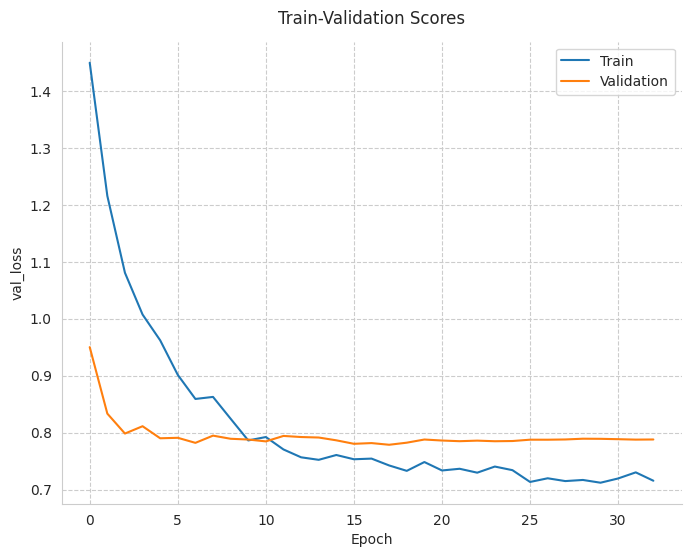

52/52 [==============================] - 1s 7ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


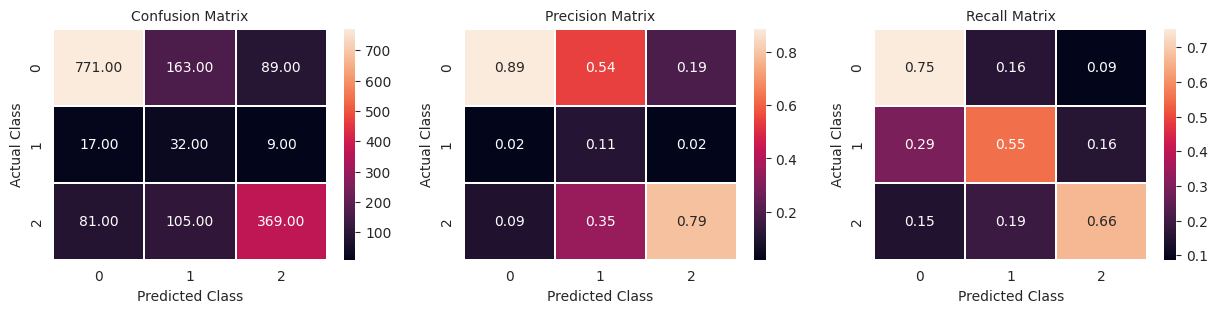


               precision    recall  f1-score   support

           0       0.89      0.75      0.82      1023
           1       0.11      0.55      0.18        58
           2       0.79      0.66      0.72       555

    accuracy                           0.72      1636
   macro avg       0.59      0.66      0.57      1636
weighted avg       0.83      0.72      0.76      1636

y_hat shape:(5271, 3)
Test log_loss: 0.78%

Running CV 7

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 6s 17ms/step - loss: 1.4868 - auc_22: 0.5408 - val_loss: 0.8685 - val_auc_22: 0.7154 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 19ms/step - loss: 1.1320 - auc_22: 0.6362 - val_loss: 0.8022 - val_auc_22: 0.7658 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 25ms/step - loss: 1.0831 - auc_22: 0.6315 - val_loss: 0.8016 - val_auc_22: 0.7701 - lr: 5.0000e-04
Epoch 4/200
205/205 [===========

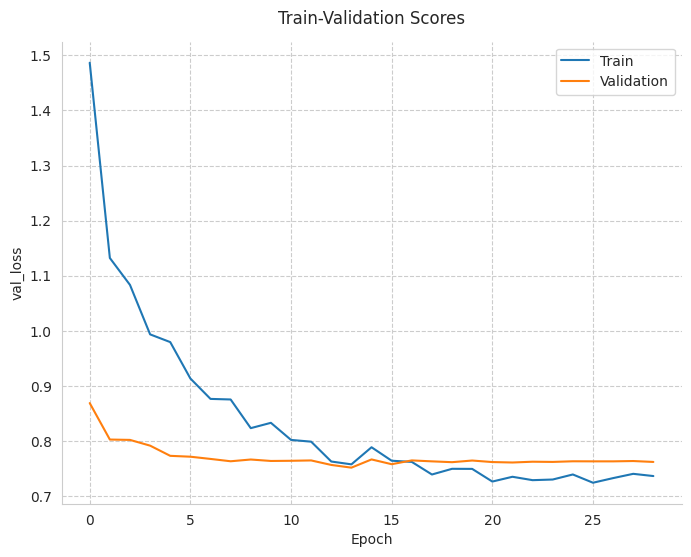

52/52 [==============================] - 1s 5ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


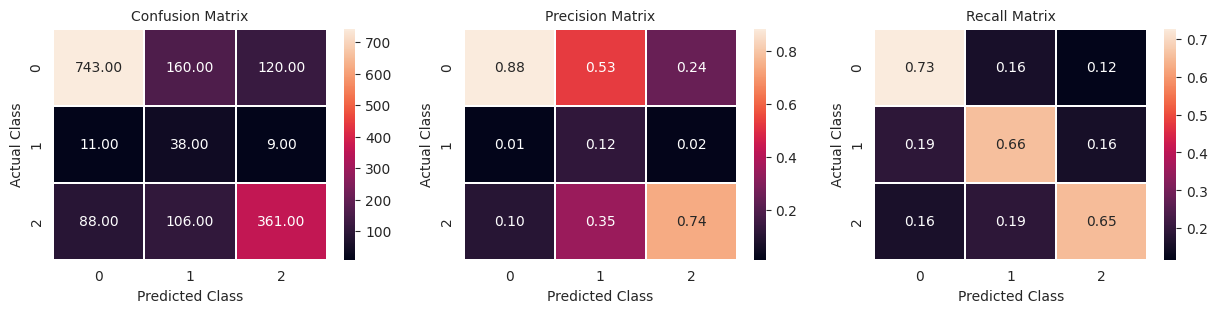


               precision    recall  f1-score   support

           0       0.88      0.73      0.80      1023
           1       0.12      0.66      0.21        58
           2       0.74      0.65      0.69       555

    accuracy                           0.70      1636
   macro avg       0.58      0.68      0.57      1636
weighted avg       0.81      0.70      0.74      1636

y_hat shape:(5271, 3)
Test log_loss: 0.75%

Running CV 8

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 6s 17ms/step - loss: 1.4341 - auc_23: 0.5555 - val_loss: 0.8779 - val_auc_23: 0.7332 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 22ms/step - loss: 1.1453 - auc_23: 0.6143 - val_loss: 0.8536 - val_auc_23: 0.7602 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 23ms/step - loss: 1.0950 - auc_23: 0.6399 - val_loss: 0.8201 - val_auc_23: 0.7827 - lr: 5.0000e-04
Epoch 4/200
205/205 [===========

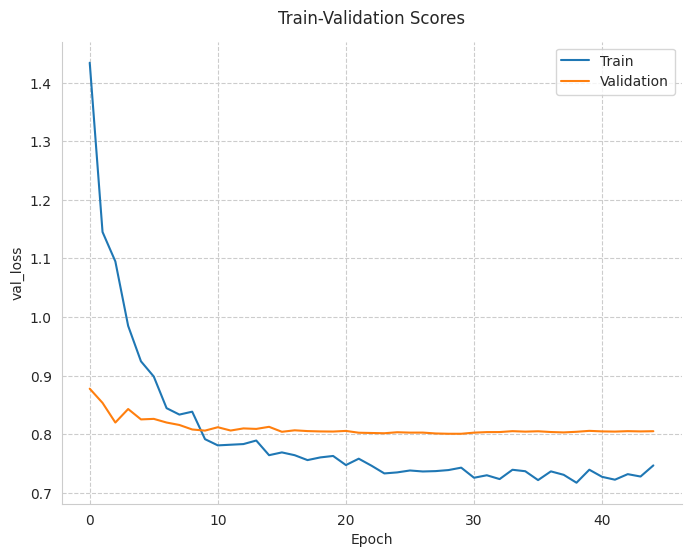

52/52 [==============================] - 1s 5ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


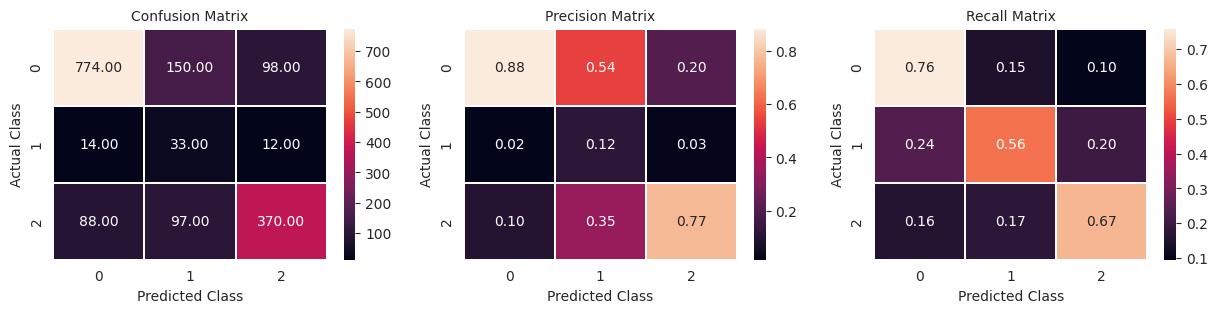


               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1022
           1       0.12      0.56      0.19        59
           2       0.77      0.67      0.71       555

    accuracy                           0.72      1636
   macro avg       0.59      0.66      0.58      1636
weighted avg       0.82      0.72      0.76      1636

y_hat shape:(5271, 3)
Test log_loss: 0.8%

Running CV 9

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 23ms/step - loss: 1.5554 - auc_24: 0.5120 - val_loss: 0.9373 - val_auc_24: 0.6427 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 18ms/step - loss: 1.2443 - auc_24: 0.5895 - val_loss: 0.8067 - val_auc_24: 0.7926 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 4s 19ms/step - loss: 1.1611 - auc_24: 0.6420 - val_loss: 0.7726 - val_auc_24: 0.7883 - lr: 5.0000e-04
Epoch 4/200
205/205 [============

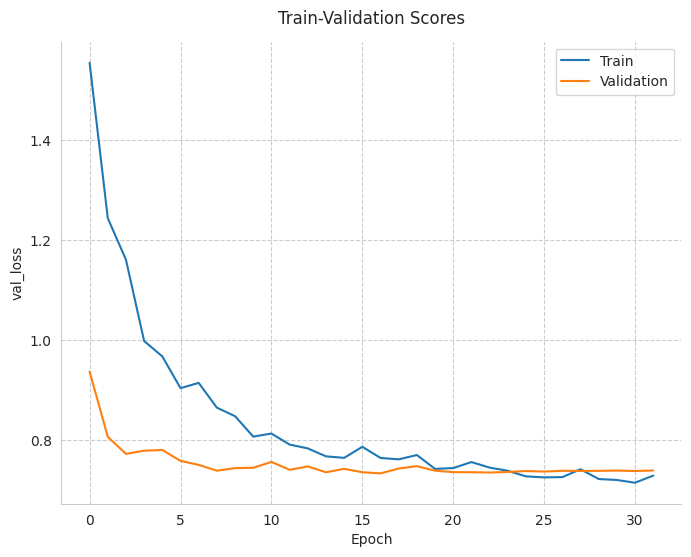

52/52 [==============================] - 1s 5ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


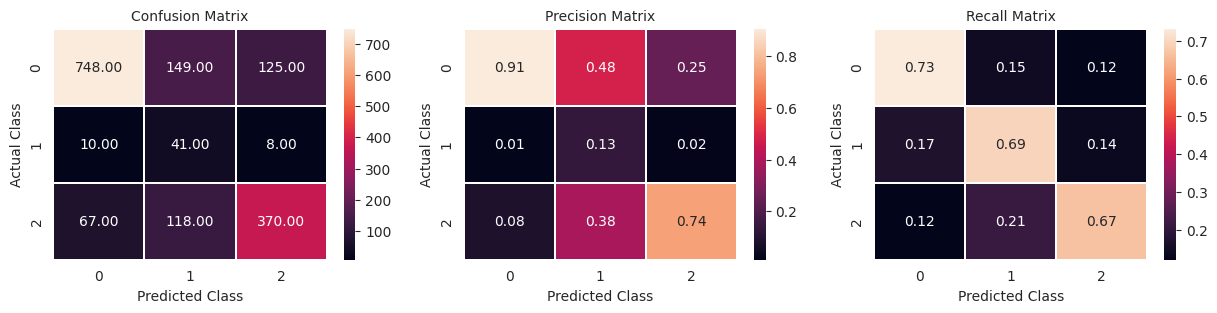


               precision    recall  f1-score   support

           0       0.91      0.73      0.81      1022
           1       0.13      0.69      0.22        59
           2       0.74      0.67      0.70       555

    accuracy                           0.71      1636
   macro avg       0.59      0.70      0.58      1636
weighted avg       0.82      0.71      0.75      1636

y_hat shape:(5271, 3)
Test log_loss: 0.73%

Running CV 10

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 18ms/step - loss: 1.5845 - auc_25: 0.5194 - val_loss: 1.1063 - val_auc_25: 0.3590 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 3s 16ms/step - loss: 1.1927 - auc_25: 0.6185 - val_loss: 0.8624 - val_auc_25: 0.6418 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 22ms/step - loss: 1.0746 - auc_25: 0.6373 - val_loss: 0.8087 - val_auc_25: 0.7194 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

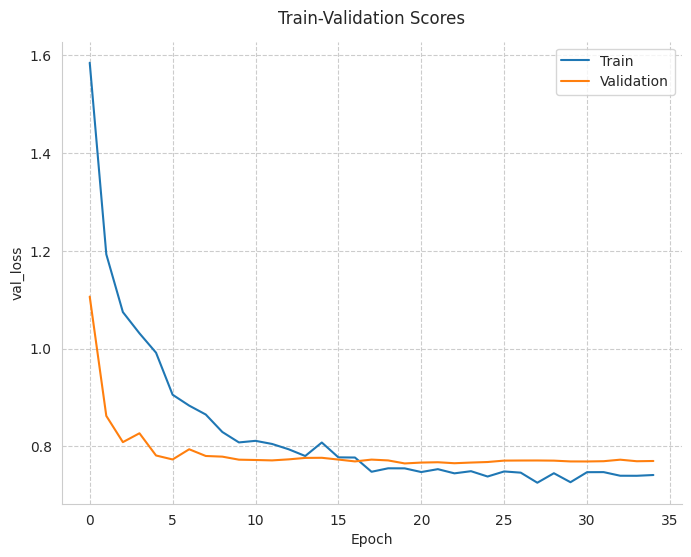

52/52 [==============================] - 1s 4ms/step
(1637,) (1637, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


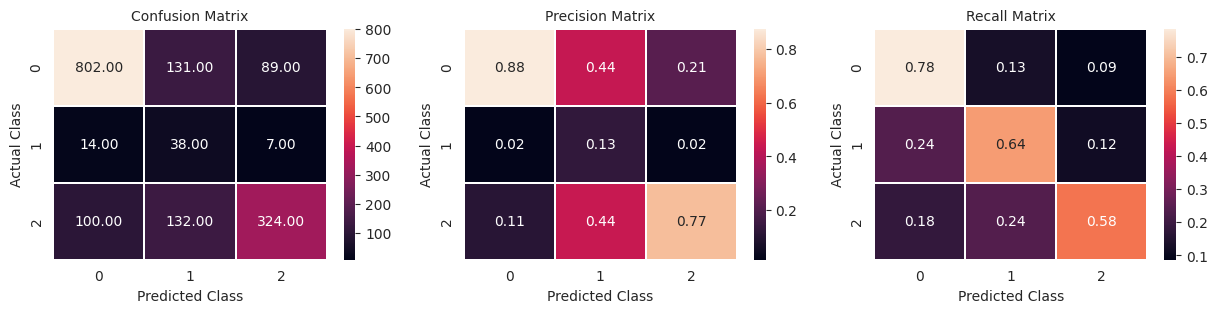


               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1022
           1       0.13      0.64      0.21        59
           2       0.77      0.58      0.66       556

    accuracy                           0.71      1637
   macro avg       0.59      0.67      0.57      1637
weighted avg       0.81      0.71      0.75      1637

y_hat shape:(5271, 3)
Test log_loss: 0.77%

Running CV 11

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 11s 28ms/step - loss: 1.4552 - auc_26: 0.5226 - val_loss: 0.9265 - val_auc_26: 0.5991 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 3s 16ms/step - loss: 1.2100 - auc_26: 0.6153 - val_loss: 0.8041 - val_auc_26: 0.7560 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 4s 17ms/step - loss: 1.1344 - auc_26: 0.6333 - val_loss: 0.7570 - val_auc_26: 0.7394 - lr: 5.0000e-04
Epoch 4/200
205/205 [=========

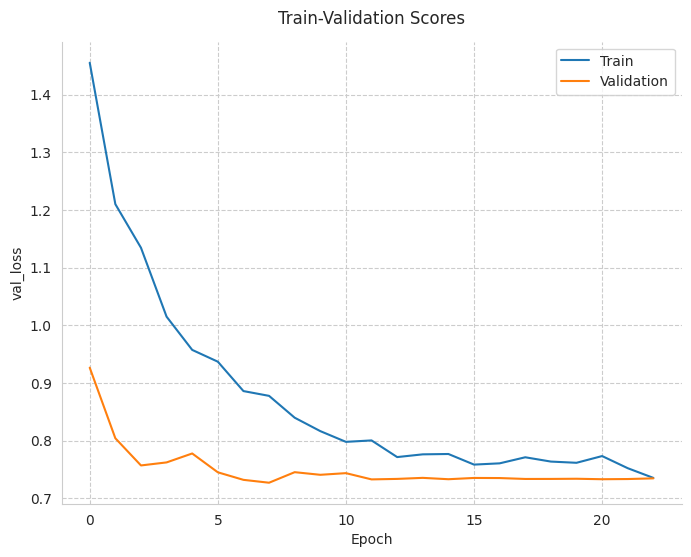

52/52 [==============================] - 1s 4ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


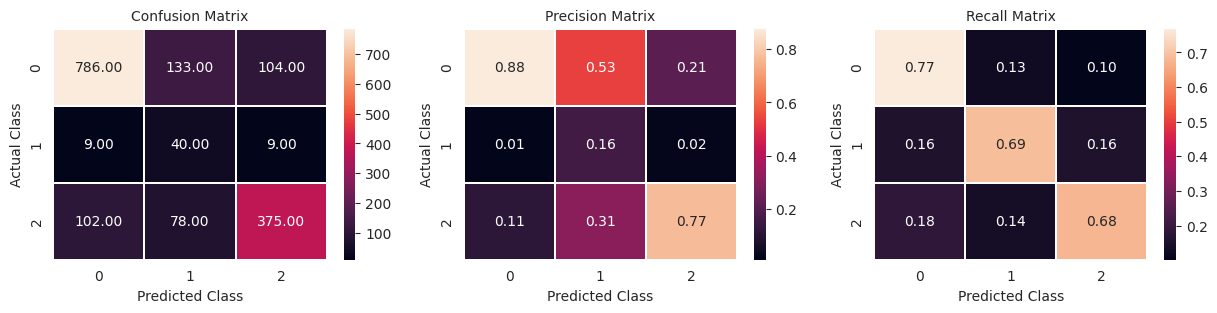


               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1023
           1       0.16      0.69      0.26        58
           2       0.77      0.68      0.72       555

    accuracy                           0.73      1636
   macro avg       0.60      0.71      0.60      1636
weighted avg       0.81      0.73      0.77      1636

y_hat shape:(5271, 3)
Test log_loss: 0.73%

Running CV 12

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 6s 18ms/step - loss: 1.5119 - auc_27: 0.5221 - val_loss: 0.8746 - val_auc_27: 0.6078 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 19ms/step - loss: 1.2898 - auc_27: 0.5781 - val_loss: 0.7903 - val_auc_27: 0.7136 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 24ms/step - loss: 1.1337 - auc_27: 0.6152 - val_loss: 0.7635 - val_auc_27: 0.7393 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

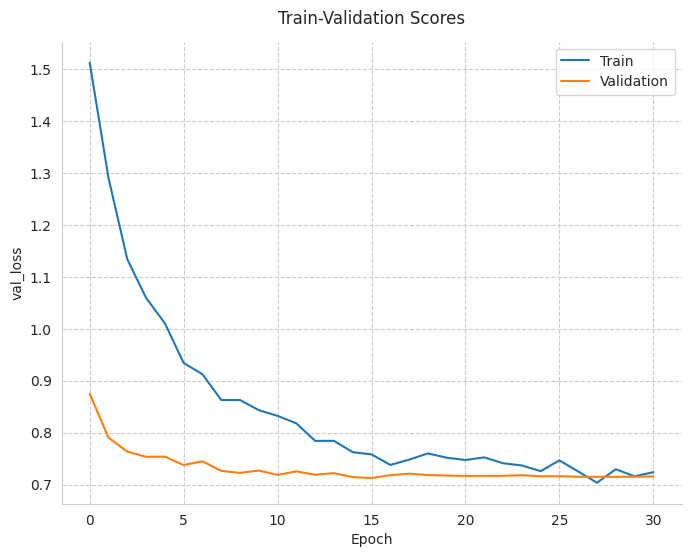

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


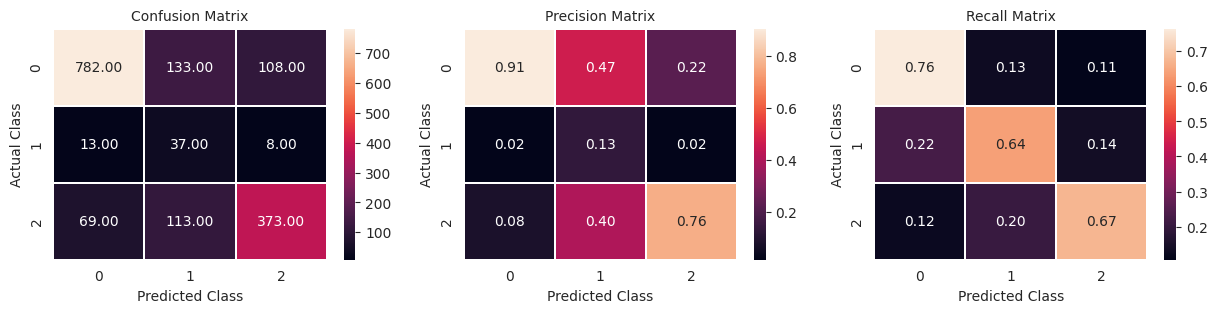


               precision    recall  f1-score   support

           0       0.91      0.76      0.83      1023
           1       0.13      0.64      0.22        58
           2       0.76      0.67      0.71       555

    accuracy                           0.73      1636
   macro avg       0.60      0.69      0.59      1636
weighted avg       0.83      0.73      0.77      1636

y_hat shape:(5271, 3)
Test log_loss: 0.71%

Running CV 13

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 21ms/step - loss: 1.4959 - auc_28: 0.5299 - val_loss: 0.8425 - val_auc_28: 0.7279 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 3s 15ms/step - loss: 1.1852 - auc_28: 0.5983 - val_loss: 0.7683 - val_auc_28: 0.7593 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 4s 17ms/step - loss: 1.1103 - auc_28: 0.6348 - val_loss: 0.7487 - val_auc_28: 0.7821 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

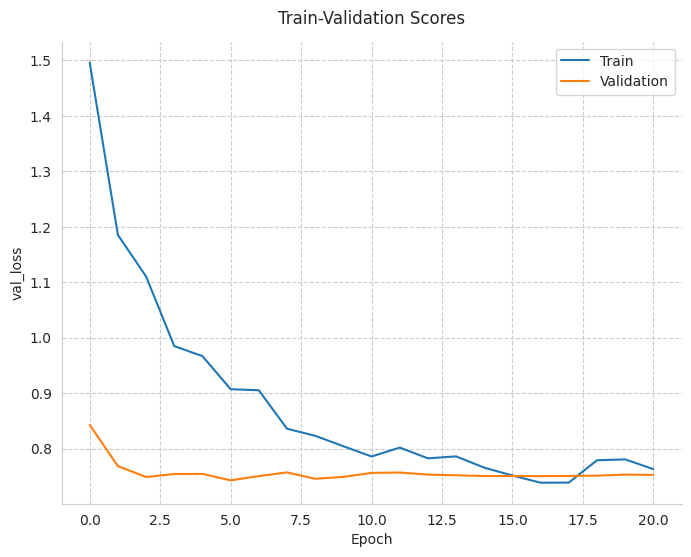

52/52 [==============================] - 1s 5ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


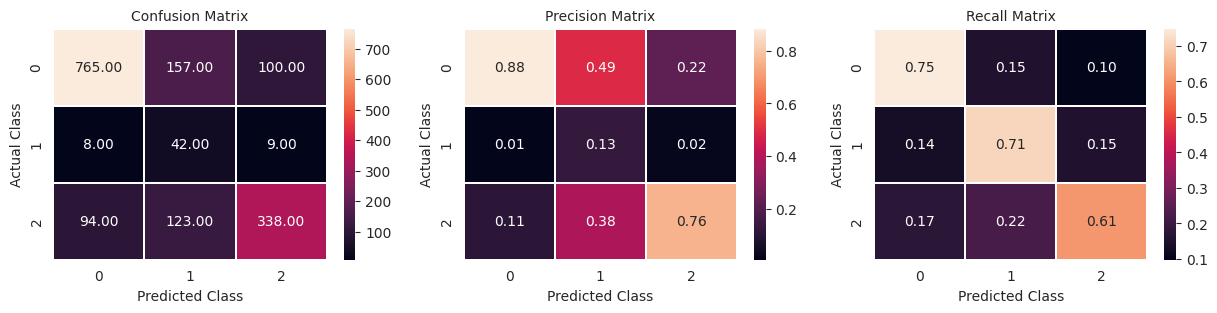


               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1022
           1       0.13      0.71      0.22        59
           2       0.76      0.61      0.67       555

    accuracy                           0.70      1636
   macro avg       0.59      0.69      0.57      1636
weighted avg       0.81      0.70      0.74      1636

y_hat shape:(5271, 3)
Test log_loss: 0.74%

Running CV 14

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 20ms/step - loss: 1.3861 - auc_29: 0.5471 - val_loss: 0.9585 - val_auc_29: 0.5318 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 3s 16ms/step - loss: 1.2041 - auc_29: 0.6063 - val_loss: 0.8540 - val_auc_29: 0.7956 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 23ms/step - loss: 1.0541 - auc_29: 0.6496 - val_loss: 0.8588 - val_auc_29: 0.7232 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

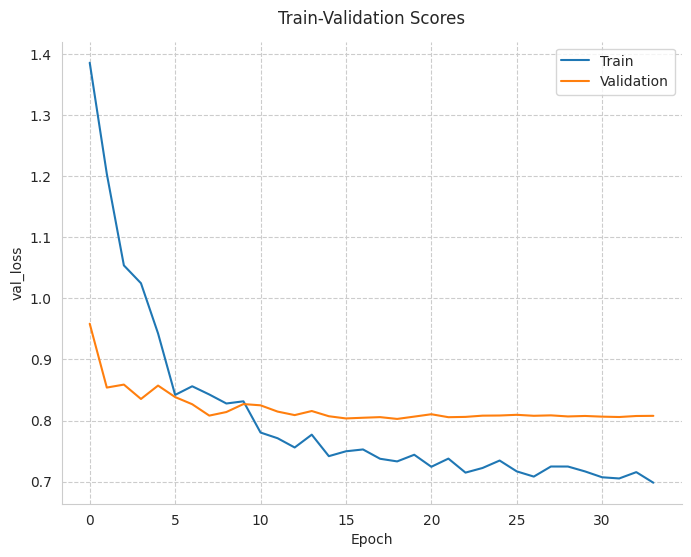

52/52 [==============================] - 1s 5ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


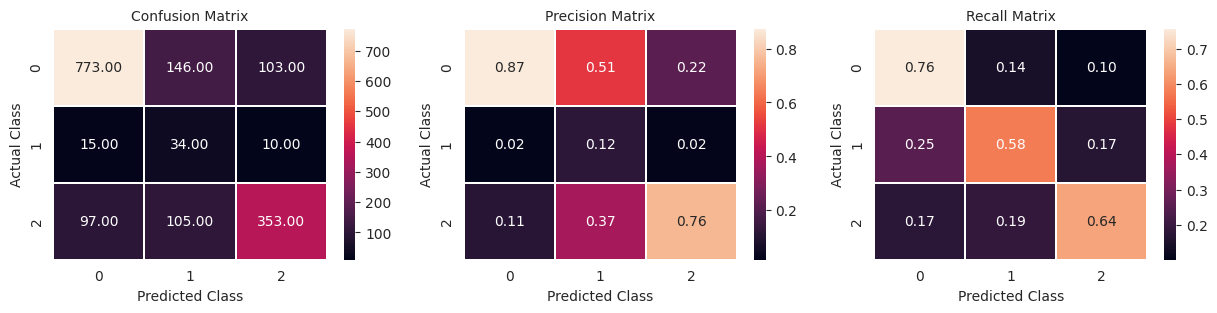


               precision    recall  f1-score   support

           0       0.87      0.76      0.81      1022
           1       0.12      0.58      0.20        59
           2       0.76      0.64      0.69       555

    accuracy                           0.71      1636
   macro avg       0.58      0.66      0.57      1636
weighted avg       0.81      0.71      0.75      1636

y_hat shape:(5271, 3)
Test log_loss: 0.8%

Running CV 15

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 19ms/step - loss: 1.4085 - auc_30: 0.5213 - val_loss: 0.9461 - val_auc_30: 0.7650 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 3s 16ms/step - loss: 1.2165 - auc_30: 0.6085 - val_loss: 0.8694 - val_auc_30: 0.7667 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 25ms/step - loss: 1.0474 - auc_30: 0.6475 - val_loss: 0.8623 - val_auc_30: 0.7900 - lr: 5.0000e-04
Epoch 4/200
205/205 [===========

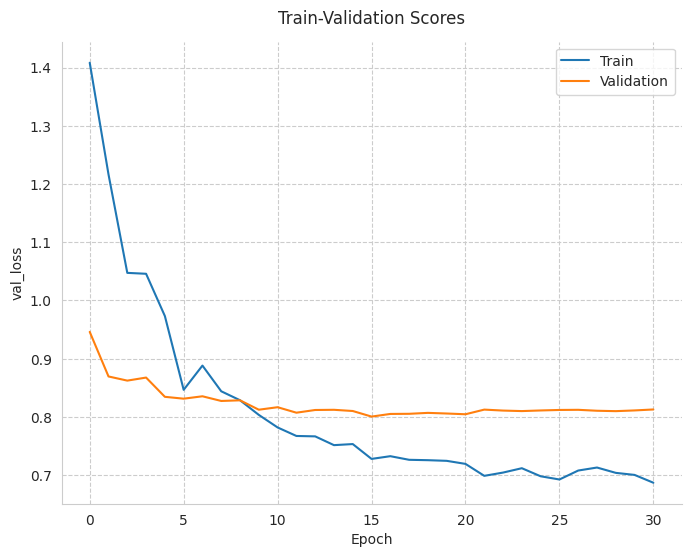

52/52 [==============================] - 1s 7ms/step
(1637,) (1637, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


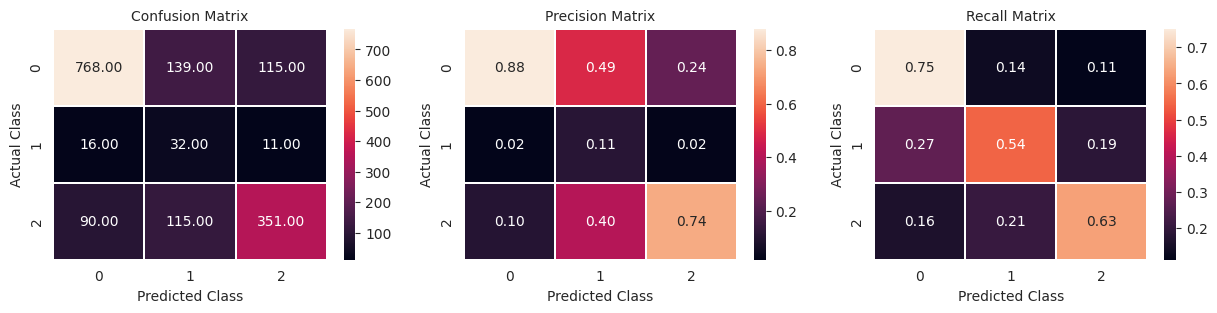


               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1022
           1       0.11      0.54      0.19        59
           2       0.74      0.63      0.68       556

    accuracy                           0.70      1637
   macro avg       0.58      0.64      0.56      1637
weighted avg       0.80      0.70      0.74      1637

y_hat shape:(5271, 3)
Test log_loss: 0.8%

Running CV 16

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 10s 28ms/step - loss: 1.4903 - auc_31: 0.5153 - val_loss: 0.8534 - val_auc_31: 0.7655 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 19ms/step - loss: 1.3115 - auc_31: 0.5932 - val_loss: 0.6941 - val_auc_31: 0.8113 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 3s 17ms/step - loss: 1.1560 - auc_31: 0.6230 - val_loss: 0.6762 - val_auc_31: 0.8053 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

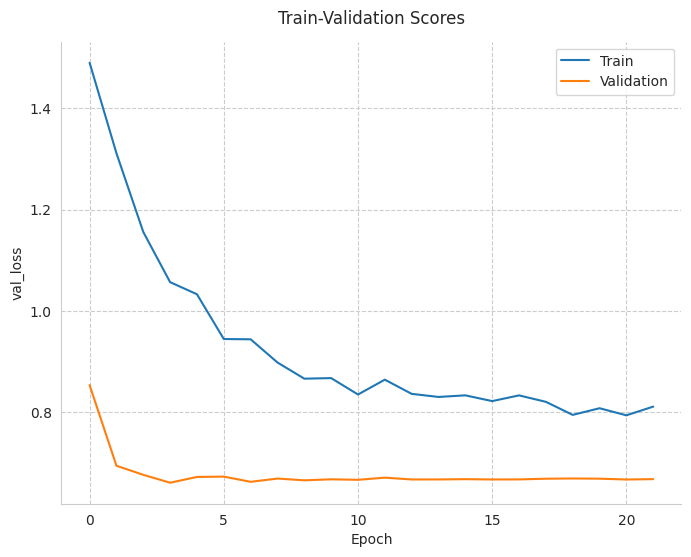

52/52 [==============================] - 1s 7ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


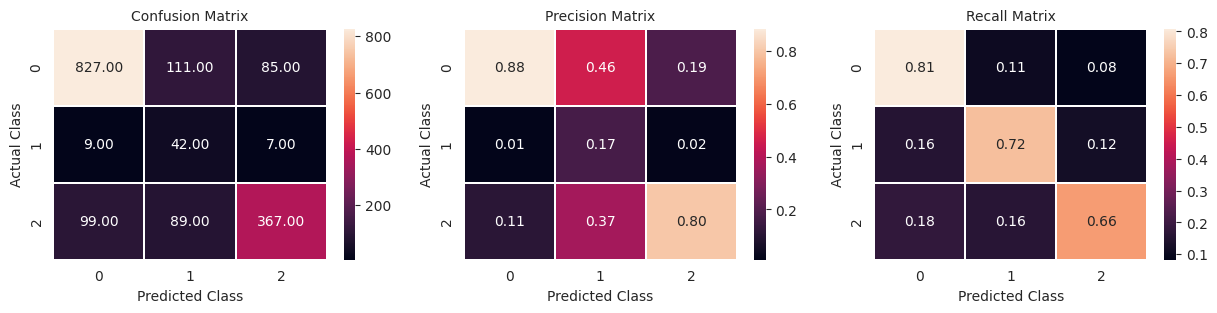


               precision    recall  f1-score   support

           0       0.88      0.81      0.84      1023
           1       0.17      0.72      0.28        58
           2       0.80      0.66      0.72       555

    accuracy                           0.76      1636
   macro avg       0.62      0.73      0.62      1636
weighted avg       0.83      0.76      0.78      1636

y_hat shape:(5271, 3)
Test log_loss: 0.66%

Running CV 17

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 20ms/step - loss: 1.4622 - auc_32: 0.5329 - val_loss: 0.8819 - val_auc_32: 0.6189 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 23ms/step - loss: 1.1956 - auc_32: 0.6026 - val_loss: 0.8299 - val_auc_32: 0.6932 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 4s 19ms/step - loss: 1.1212 - auc_32: 0.6354 - val_loss: 0.8253 - val_auc_32: 0.7269 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

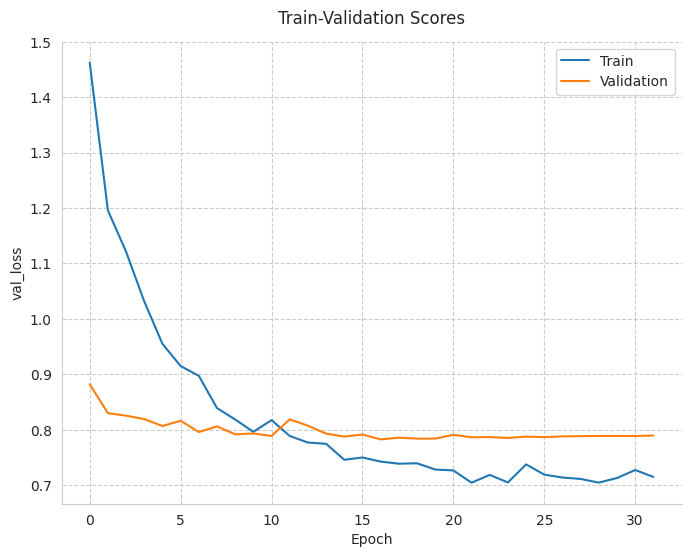

52/52 [==============================] - 1s 5ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


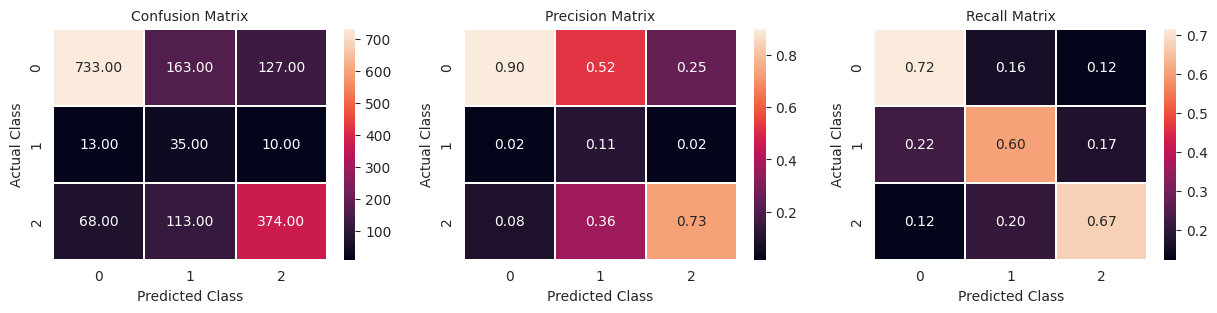


               precision    recall  f1-score   support

           0       0.90      0.72      0.80      1023
           1       0.11      0.60      0.19        58
           2       0.73      0.67      0.70       555

    accuracy                           0.70      1636
   macro avg       0.58      0.66      0.56      1636
weighted avg       0.82      0.70      0.74      1636

y_hat shape:(5271, 3)
Test log_loss: 0.78%

Running CV 18

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 20ms/step - loss: 1.4524 - auc_33: 0.5343 - val_loss: 0.9957 - val_auc_33: 0.3618 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 22ms/step - loss: 1.2430 - auc_33: 0.6022 - val_loss: 0.7623 - val_auc_33: 0.7163 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 22ms/step - loss: 1.1265 - auc_33: 0.6306 - val_loss: 0.7408 - val_auc_33: 0.7730 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

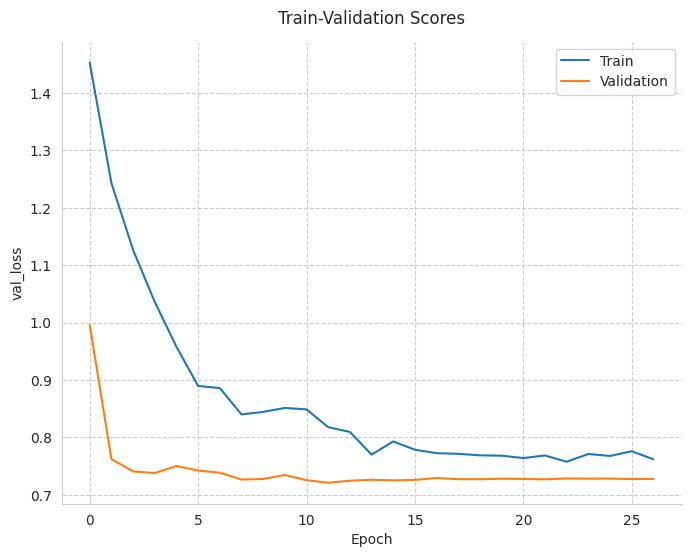

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


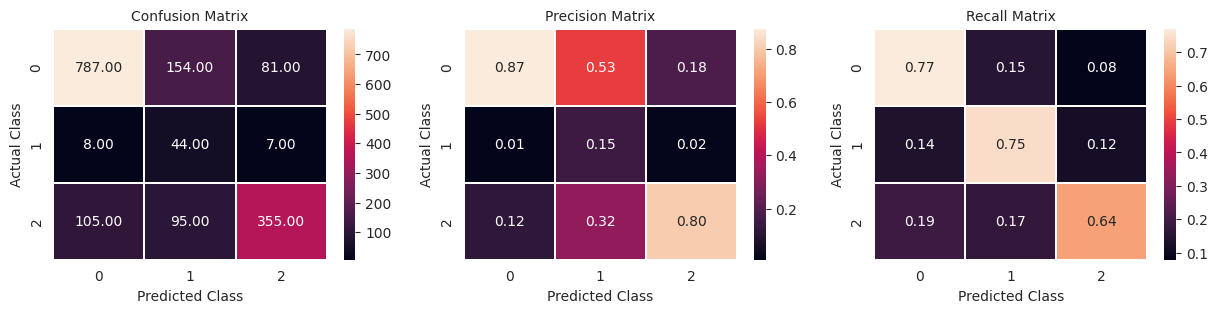


               precision    recall  f1-score   support

           0       0.87      0.77      0.82      1022
           1       0.15      0.75      0.25        59
           2       0.80      0.64      0.71       555

    accuracy                           0.72      1636
   macro avg       0.61      0.72      0.59      1636
weighted avg       0.82      0.72      0.76      1636

y_hat shape:(5271, 3)
Test log_loss: 0.72%

Running CV 19

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 9s 23ms/step - loss: 1.4310 - auc_34: 0.5330 - val_loss: 0.8842 - val_auc_34: 0.4838 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 21ms/step - loss: 1.1984 - auc_34: 0.6028 - val_loss: 0.7807 - val_auc_34: 0.7660 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 6s 28ms/step - loss: 1.1167 - auc_34: 0.6436 - val_loss: 0.7826 - val_auc_34: 0.7557 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

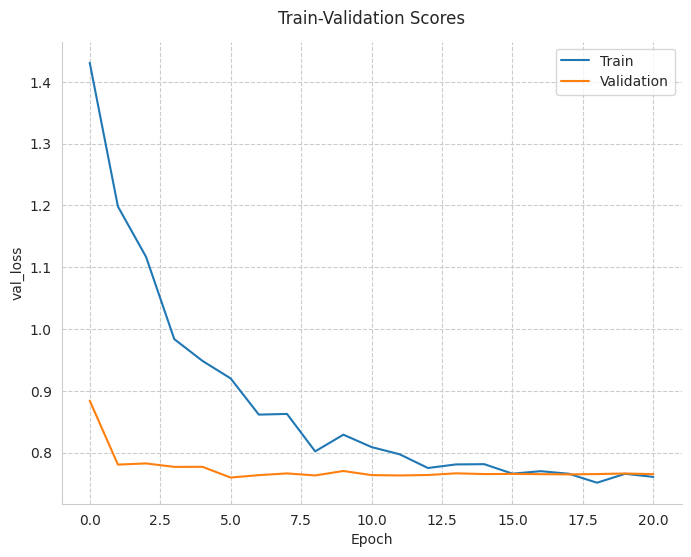

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


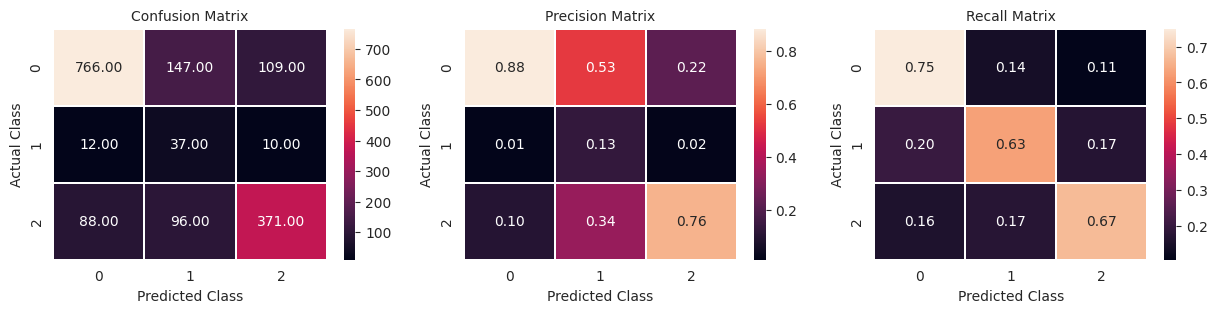


               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1022
           1       0.13      0.63      0.22        59
           2       0.76      0.67      0.71       555

    accuracy                           0.72      1636
   macro avg       0.59      0.68      0.58      1636
weighted avg       0.81      0.72      0.76      1636

y_hat shape:(5271, 3)
Test log_loss: 0.76%

Running CV 20

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 21ms/step - loss: 1.4182 - auc_35: 0.5307 - val_loss: 0.9287 - val_auc_35: 0.6399 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 23ms/step - loss: 1.1923 - auc_35: 0.6016 - val_loss: 0.8512 - val_auc_35: 0.6762 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 6s 27ms/step - loss: 1.0948 - auc_35: 0.6443 - val_loss: 0.8275 - val_auc_35: 0.7232 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

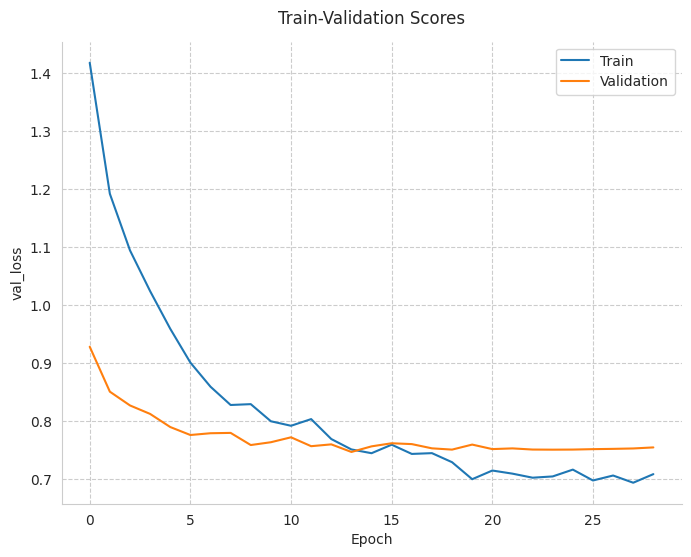

52/52 [==============================] - 1s 6ms/step
(1637,) (1637, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


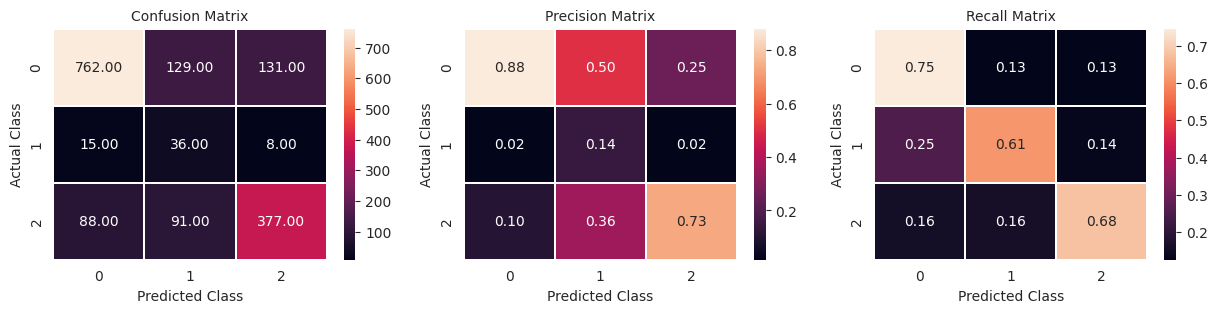


               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1022
           1       0.14      0.61      0.23        59
           2       0.73      0.68      0.70       556

    accuracy                           0.72      1637
   macro avg       0.58      0.68      0.58      1637
weighted avg       0.80      0.72      0.75      1637

y_hat shape:(5271, 3)
Test log_loss: 0.75%

Running CV 21

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 24ms/step - loss: 1.3980 - auc_36: 0.5186 - val_loss: 0.8871 - val_auc_36: 0.7170 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 19ms/step - loss: 1.1496 - auc_36: 0.6127 - val_loss: 0.7590 - val_auc_36: 0.7780 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 23ms/step - loss: 1.1272 - auc_36: 0.6179 - val_loss: 0.7712 - val_auc_36: 0.8071 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

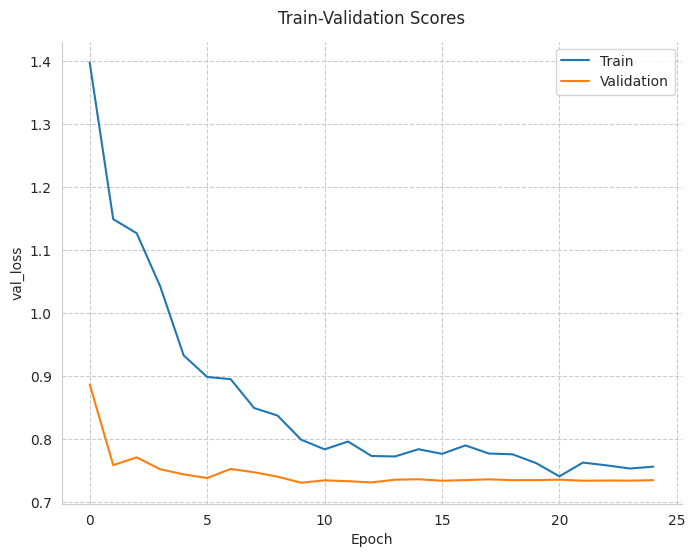

52/52 [==============================] - 1s 7ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


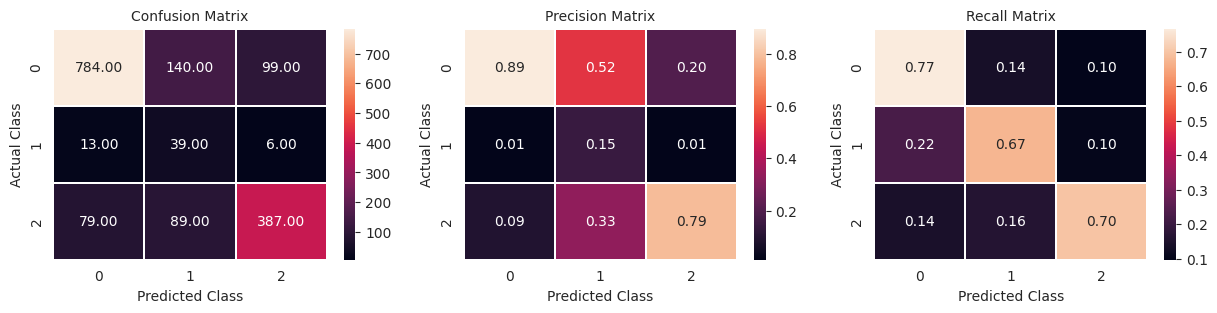


               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1023
           1       0.15      0.67      0.24        58
           2       0.79      0.70      0.74       555

    accuracy                           0.74      1636
   macro avg       0.61      0.71      0.60      1636
weighted avg       0.83      0.74      0.78      1636

y_hat shape:(5271, 3)
Test log_loss: 0.73%

Running CV 22

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 23ms/step - loss: 1.5079 - auc_37: 0.5263 - val_loss: 0.9114 - val_auc_37: 0.6726 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 21ms/step - loss: 1.1563 - auc_37: 0.6149 - val_loss: 0.7758 - val_auc_37: 0.7083 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 4s 21ms/step - loss: 1.0751 - auc_37: 0.6411 - val_loss: 0.7650 - val_auc_37: 0.8126 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

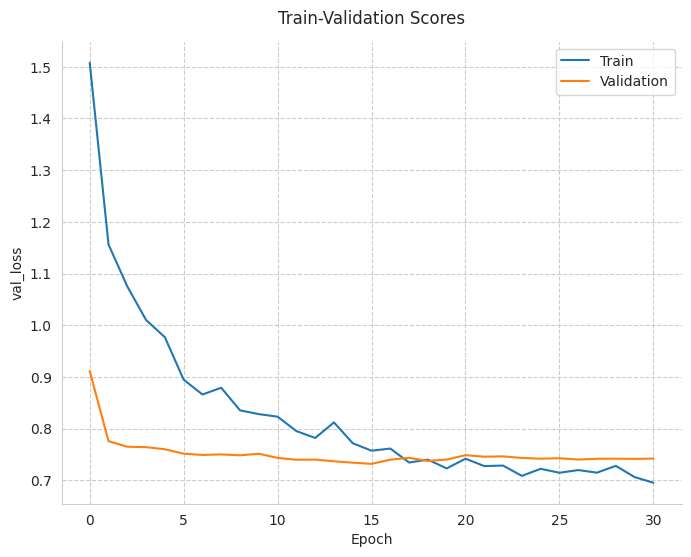

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


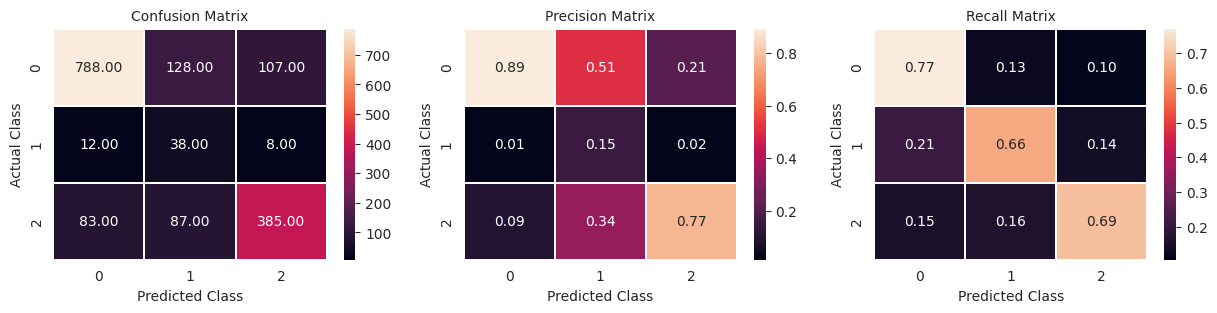


               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1023
           1       0.15      0.66      0.24        58
           2       0.77      0.69      0.73       555

    accuracy                           0.74      1636
   macro avg       0.60      0.71      0.60      1636
weighted avg       0.82      0.74      0.77      1636

y_hat shape:(5271, 3)
Test log_loss: 0.73%

Running CV 23

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 27ms/step - loss: 1.4279 - auc_38: 0.5592 - val_loss: 0.8531 - val_auc_38: 0.7388 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 24ms/step - loss: 1.1794 - auc_38: 0.6084 - val_loss: 0.8159 - val_auc_38: 0.7021 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 24ms/step - loss: 1.0669 - auc_38: 0.6531 - val_loss: 0.8031 - val_auc_38: 0.7816 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

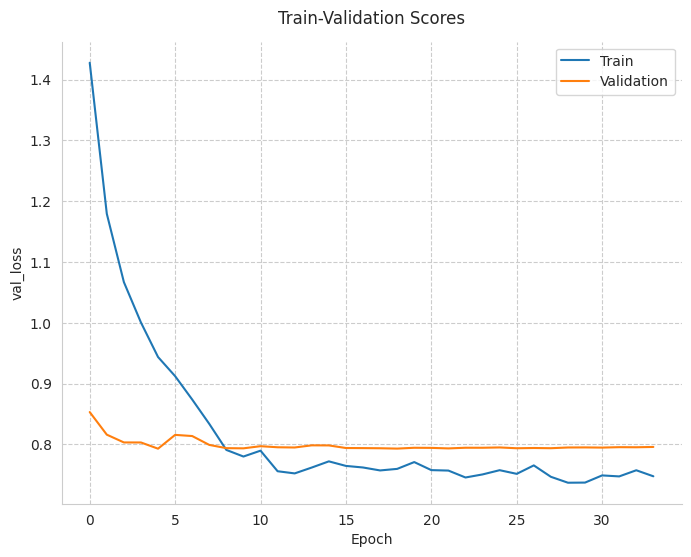

52/52 [==============================] - 1s 7ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


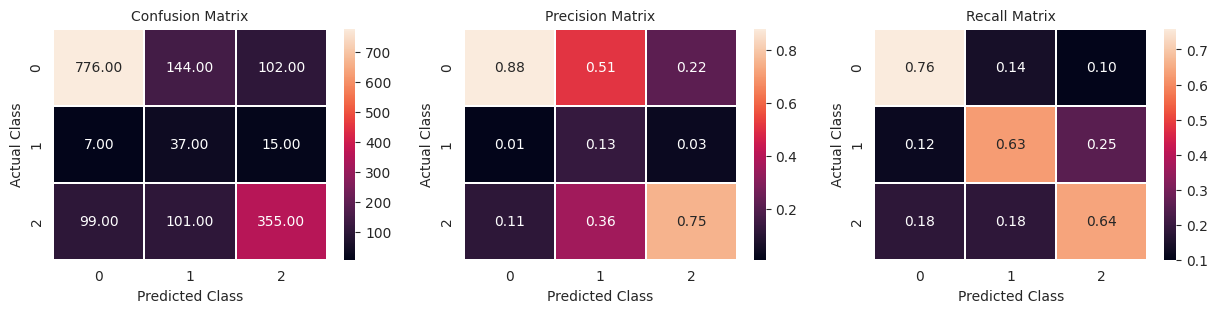


               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1022
           1       0.13      0.63      0.22        59
           2       0.75      0.64      0.69       555

    accuracy                           0.71      1636
   macro avg       0.59      0.68      0.57      1636
weighted avg       0.81      0.71      0.75      1636

y_hat shape:(5271, 3)
Test log_loss: 0.79%

Running CV 24

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 22ms/step - loss: 1.4018 - auc_39: 0.5447 - val_loss: 1.0328 - val_auc_39: 0.6063 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 19ms/step - loss: 1.1861 - auc_39: 0.6053 - val_loss: 0.8362 - val_auc_39: 0.7008 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 25ms/step - loss: 1.0895 - auc_39: 0.6363 - val_loss: 0.7781 - val_auc_39: 0.7644 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

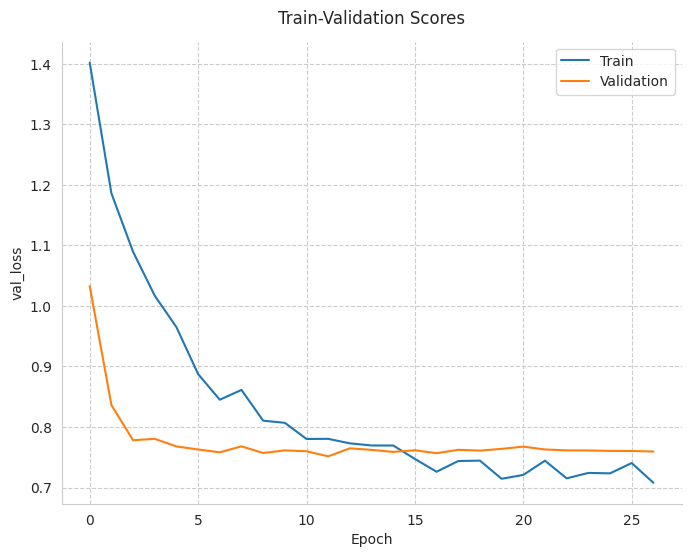

52/52 [==============================] - 1s 5ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


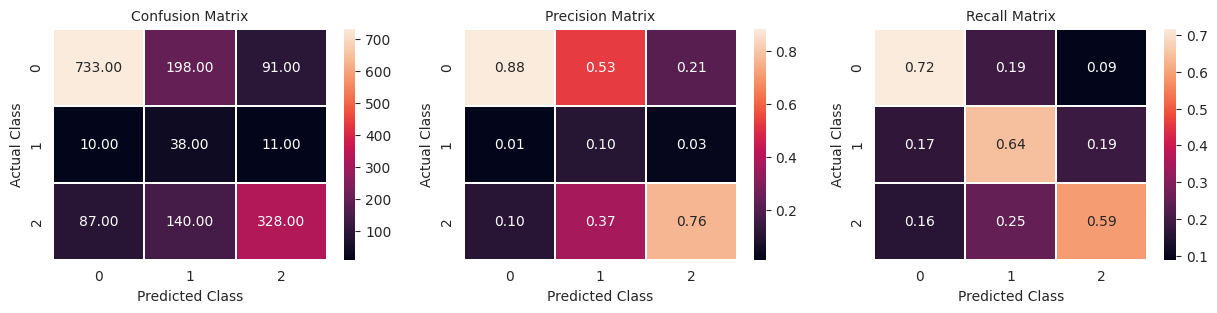


               precision    recall  f1-score   support

           0       0.88      0.72      0.79      1022
           1       0.10      0.64      0.17        59
           2       0.76      0.59      0.67       555

    accuracy                           0.67      1636
   macro avg       0.58      0.65      0.54      1636
weighted avg       0.81      0.67      0.73      1636

y_hat shape:(5271, 3)
Test log_loss: 0.75%

Running CV 25

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 28ms/step - loss: 1.4849 - auc_40: 0.5378 - val_loss: 0.9958 - val_auc_40: 0.5855 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 23ms/step - loss: 1.1702 - auc_40: 0.6153 - val_loss: 0.8371 - val_auc_40: 0.6771 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 26ms/step - loss: 1.0880 - auc_40: 0.6453 - val_loss: 0.8601 - val_auc_40: 0.6128 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

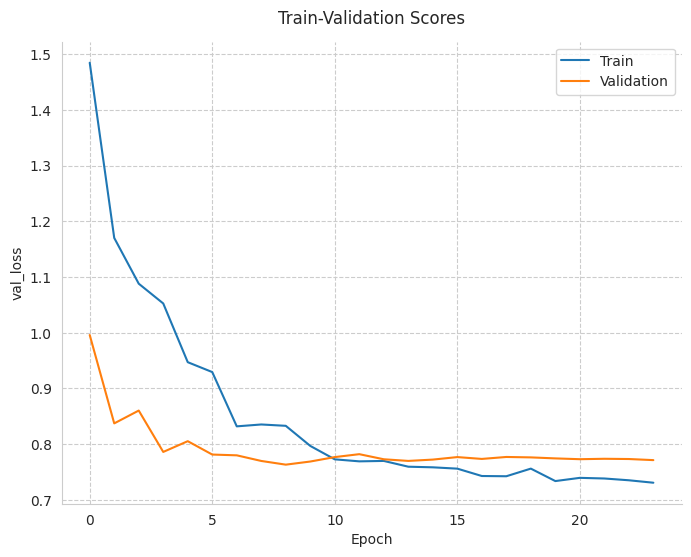

52/52 [==============================] - 1s 6ms/step
(1637,) (1637, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


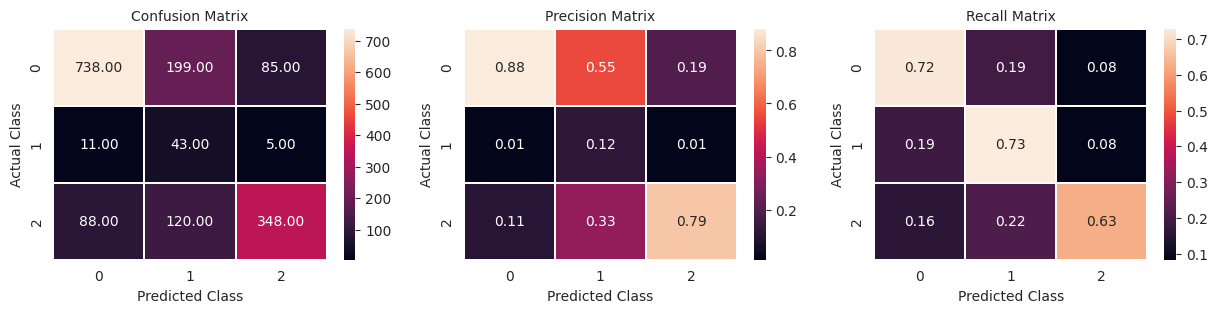


               precision    recall  f1-score   support

           0       0.88      0.72      0.79      1022
           1       0.12      0.73      0.20        59
           2       0.79      0.63      0.70       556

    accuracy                           0.69      1637
   macro avg       0.60      0.69      0.57      1637
weighted avg       0.82      0.69      0.74      1637

y_hat shape:(5271, 3)
Test log_loss: 0.76%

Running CV 26

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 23ms/step - loss: 1.4858 - auc_41: 0.5235 - val_loss: 0.8956 - val_auc_41: 0.7004 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 21ms/step - loss: 1.2093 - auc_41: 0.6157 - val_loss: 0.7979 - val_auc_41: 0.7111 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 6s 27ms/step - loss: 1.1276 - auc_41: 0.6216 - val_loss: 0.8117 - val_auc_41: 0.8021 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

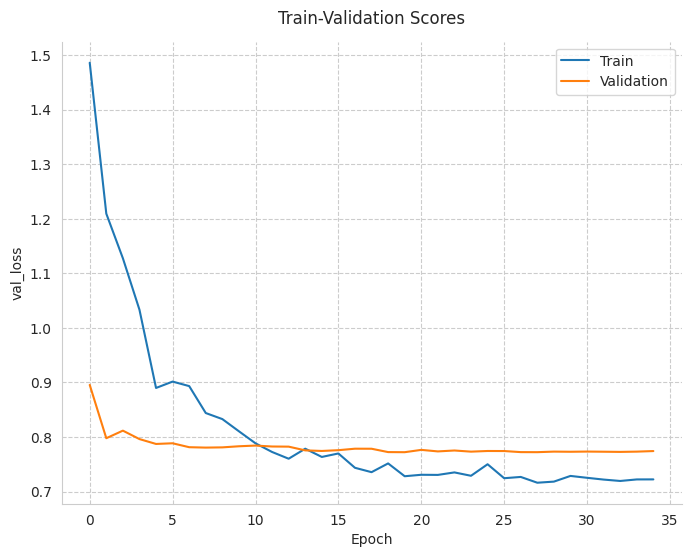

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


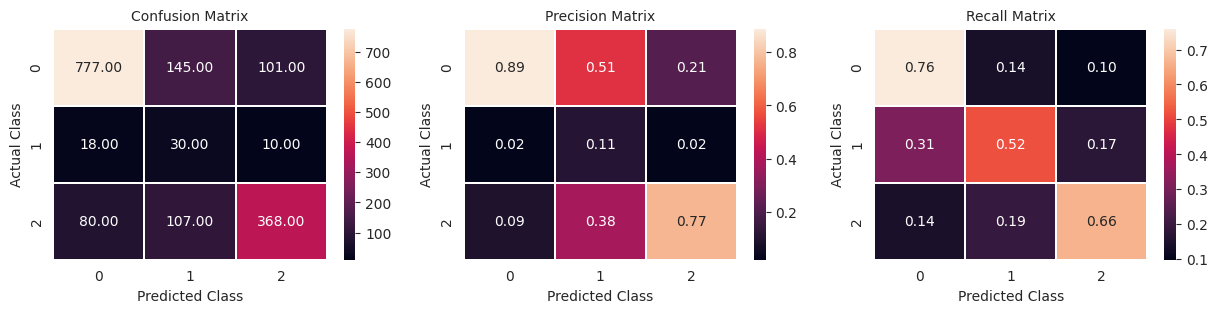


               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1023
           1       0.11      0.52      0.18        58
           2       0.77      0.66      0.71       555

    accuracy                           0.72      1636
   macro avg       0.59      0.65      0.57      1636
weighted avg       0.82      0.72      0.76      1636

y_hat shape:(5271, 3)
Test log_loss: 0.77%

Running CV 27

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 22ms/step - loss: 1.4797 - auc_42: 0.5260 - val_loss: 0.8704 - val_auc_42: 0.6890 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 23ms/step - loss: 1.2405 - auc_42: 0.6083 - val_loss: 0.7372 - val_auc_42: 0.7664 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 4s 20ms/step - loss: 1.1206 - auc_42: 0.6333 - val_loss: 0.7385 - val_auc_42: 0.7487 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

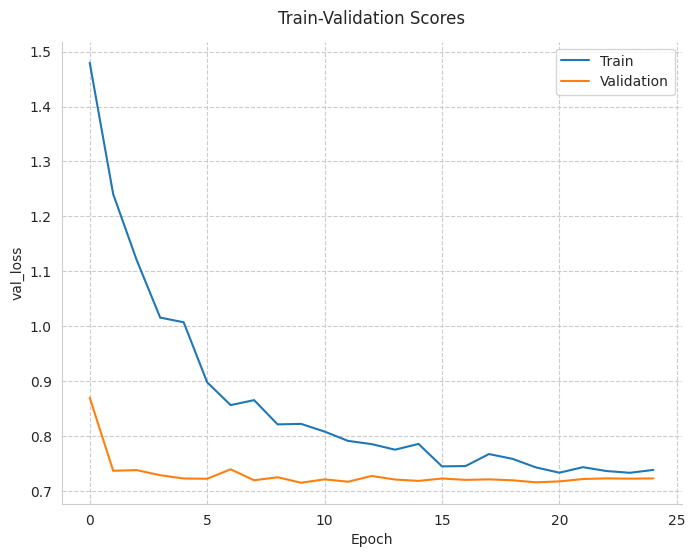

52/52 [==============================] - 1s 7ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


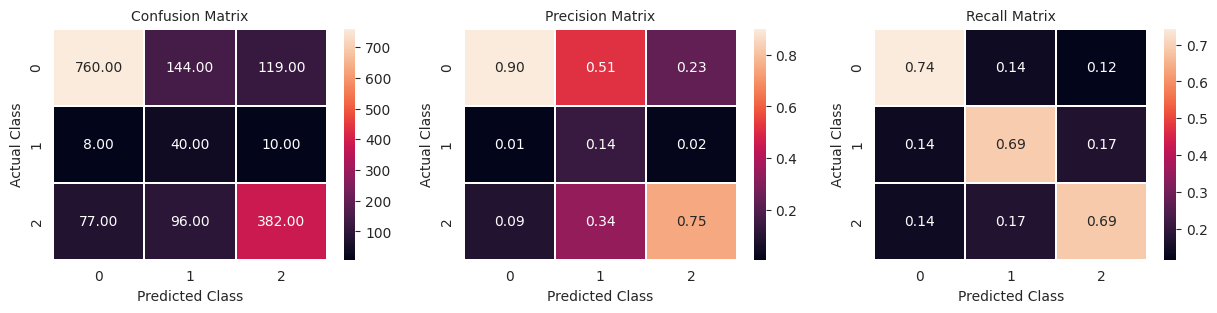


               precision    recall  f1-score   support

           0       0.90      0.74      0.81      1023
           1       0.14      0.69      0.24        58
           2       0.75      0.69      0.72       555

    accuracy                           0.72      1636
   macro avg       0.60      0.71      0.59      1636
weighted avg       0.82      0.72      0.76      1636

y_hat shape:(5271, 3)
Test log_loss: 0.72%

Running CV 28

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 25ms/step - loss: 1.4445 - auc_43: 0.5397 - val_loss: 0.8776 - val_auc_43: 0.7543 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 26ms/step - loss: 1.1987 - auc_43: 0.6148 - val_loss: 0.8266 - val_auc_43: 0.7718 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 22ms/step - loss: 1.1211 - auc_43: 0.6383 - val_loss: 0.8051 - val_auc_43: 0.7489 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

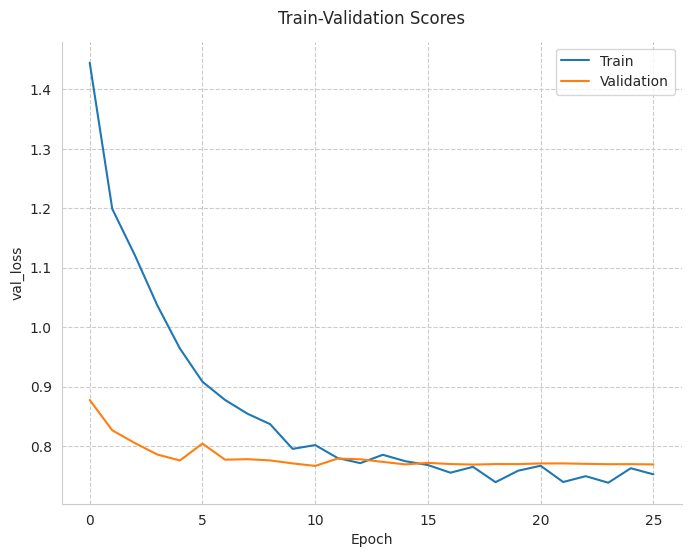

52/52 [==============================] - 1s 7ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


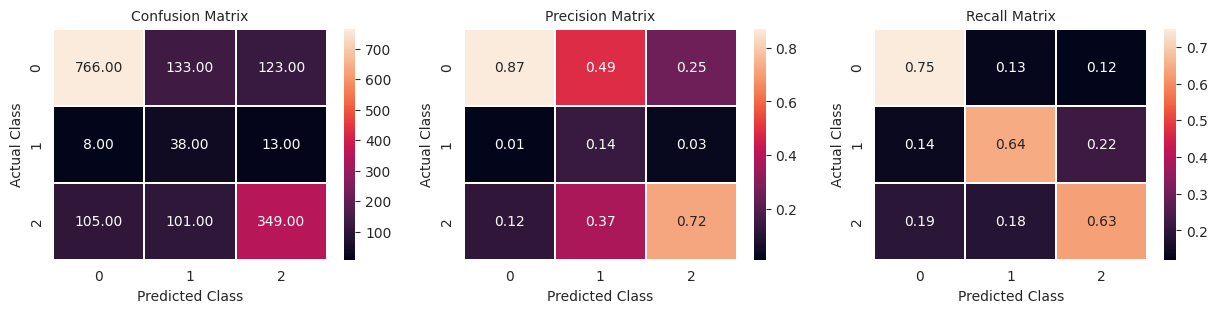


               precision    recall  f1-score   support

           0       0.87      0.75      0.81      1022
           1       0.14      0.64      0.23        59
           2       0.72      0.63      0.67       555

    accuracy                           0.70      1636
   macro avg       0.58      0.67      0.57      1636
weighted avg       0.79      0.70      0.74      1636

y_hat shape:(5271, 3)
Test log_loss: 0.77%

Running CV 29

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 23ms/step - loss: 1.4951 - auc_44: 0.5443 - val_loss: 0.8988 - val_auc_44: 0.6743 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 22ms/step - loss: 1.2479 - auc_44: 0.6036 - val_loss: 0.7974 - val_auc_44: 0.7819 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 22ms/step - loss: 1.1175 - auc_44: 0.6236 - val_loss: 0.8056 - val_auc_44: 0.8332 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

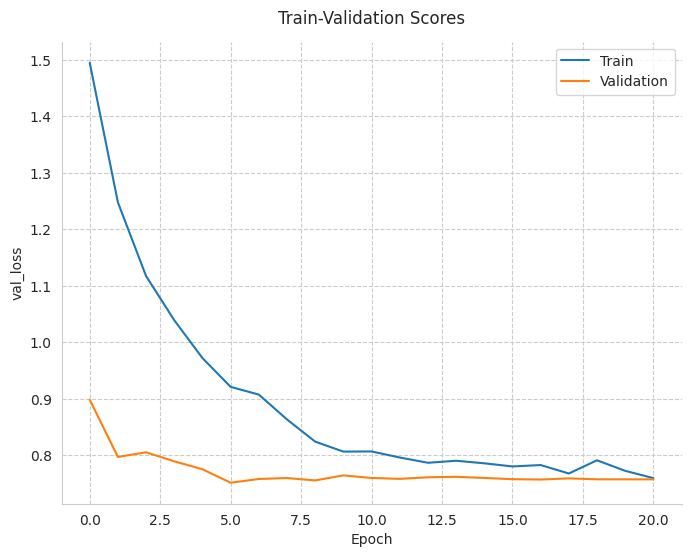

52/52 [==============================] - 1s 7ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


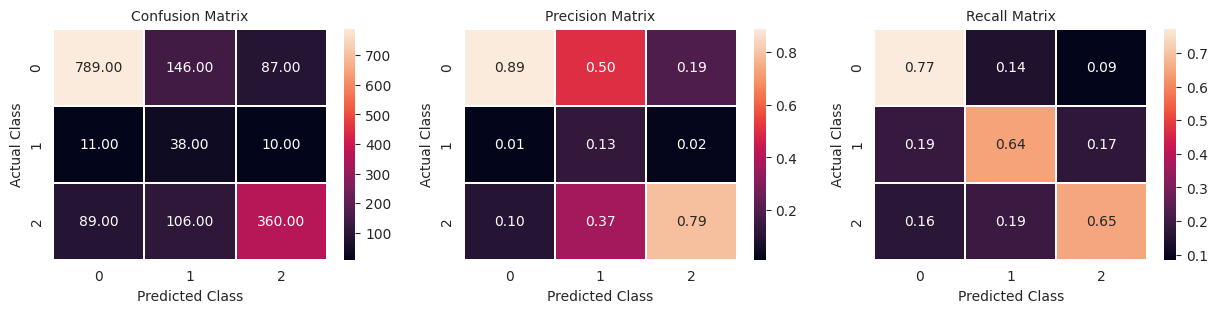


               precision    recall  f1-score   support

           0       0.89      0.77      0.83      1022
           1       0.13      0.64      0.22        59
           2       0.79      0.65      0.71       555

    accuracy                           0.73      1636
   macro avg       0.60      0.69      0.58      1636
weighted avg       0.83      0.73      0.77      1636

y_hat shape:(5271, 3)
Test log_loss: 0.75%

Running CV 30

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 23ms/step - loss: 1.4756 - auc_45: 0.5382 - val_loss: 0.8739 - val_auc_45: 0.6838 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 4s 20ms/step - loss: 1.2822 - auc_45: 0.5916 - val_loss: 0.7475 - val_auc_45: 0.8155 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 25ms/step - loss: 1.1588 - auc_45: 0.6195 - val_loss: 0.6730 - val_auc_45: 0.8105 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

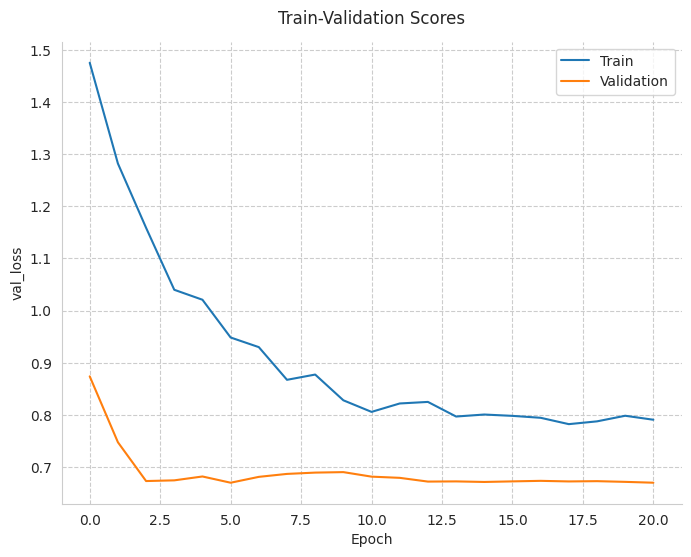

52/52 [==============================] - 1s 7ms/step
(1637,) (1637, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


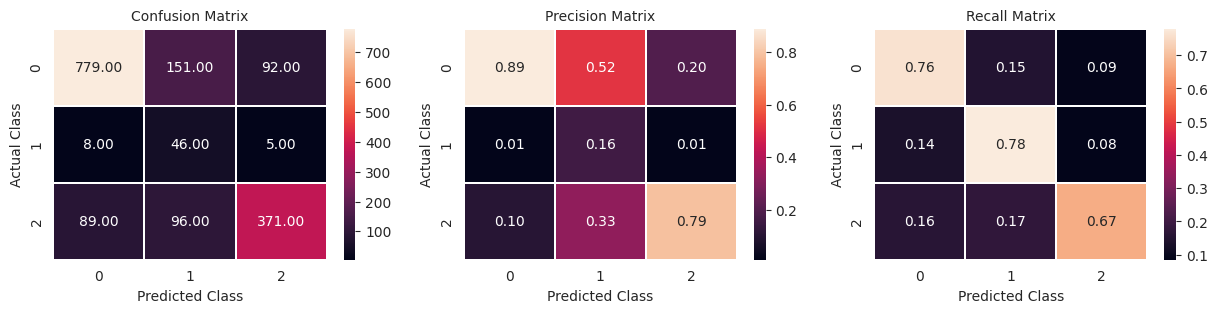


               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1022
           1       0.16      0.78      0.26        59
           2       0.79      0.67      0.72       556

    accuracy                           0.73      1637
   macro avg       0.61      0.74      0.60      1637
weighted avg       0.83      0.73      0.77      1637

y_hat shape:(5271, 3)
Test log_loss: 0.67%

Running CV 31

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 9s 26ms/step - loss: 1.4043 - auc_46: 0.5475 - val_loss: 1.1138 - val_auc_46: 0.4413 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 24ms/step - loss: 1.2186 - auc_46: 0.6039 - val_loss: 0.8965 - val_auc_46: 0.6649 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 4s 21ms/step - loss: 1.1221 - auc_46: 0.6379 - val_loss: 0.8407 - val_auc_46: 0.7412 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

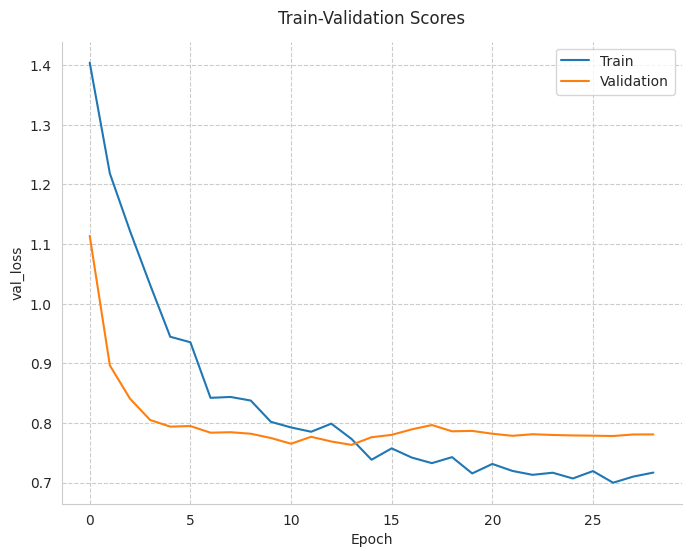

52/52 [==============================] - 1s 7ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


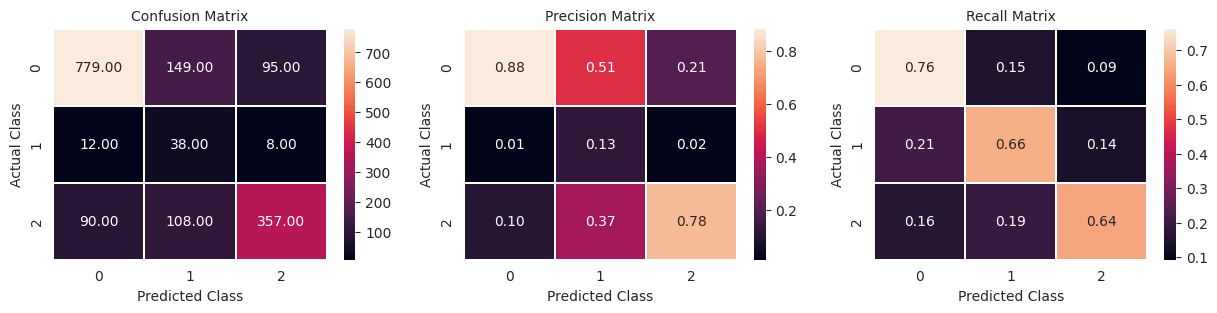


               precision    recall  f1-score   support

           0       0.88      0.76      0.82      1023
           1       0.13      0.66      0.22        58
           2       0.78      0.64      0.70       555

    accuracy                           0.72      1636
   macro avg       0.60      0.69      0.58      1636
weighted avg       0.82      0.72      0.76      1636

y_hat shape:(5271, 3)
Test log_loss: 0.76%

Running CV 32

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 29ms/step - loss: 1.4670 - auc_47: 0.5249 - val_loss: 0.8251 - val_auc_47: 0.7755 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 6s 27ms/step - loss: 1.2248 - auc_47: 0.6121 - val_loss: 0.7494 - val_auc_47: 0.7635 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 23ms/step - loss: 1.0971 - auc_47: 0.6207 - val_loss: 0.7701 - val_auc_47: 0.7527 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

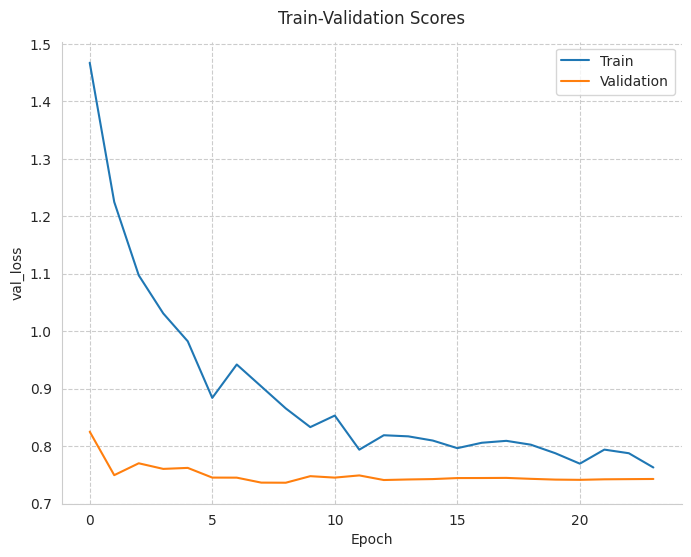

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


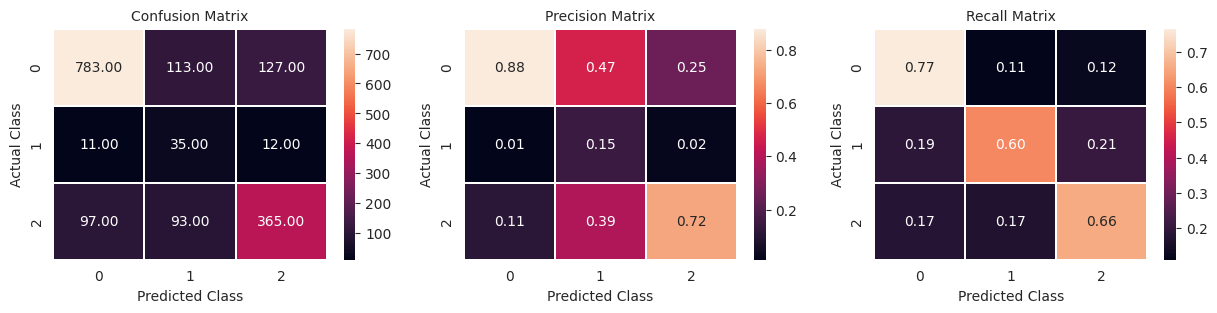


               precision    recall  f1-score   support

           0       0.88      0.77      0.82      1023
           1       0.15      0.60      0.23        58
           2       0.72      0.66      0.69       555

    accuracy                           0.72      1636
   macro avg       0.58      0.68      0.58      1636
weighted avg       0.80      0.72      0.75      1636

y_hat shape:(5271, 3)
Test log_loss: 0.74%

Running CV 33

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 24ms/step - loss: 1.4174 - auc_48: 0.5530 - val_loss: 0.9338 - val_auc_48: 0.4829 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 22ms/step - loss: 1.2100 - auc_48: 0.6172 - val_loss: 0.8491 - val_auc_48: 0.6897 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 6s 27ms/step - loss: 1.0589 - auc_48: 0.6543 - val_loss: 0.8425 - val_auc_48: 0.7028 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

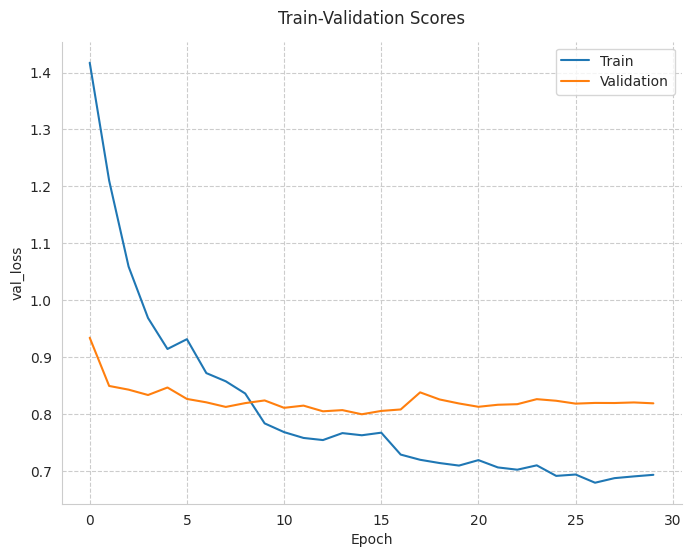

52/52 [==============================] - 1s 7ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


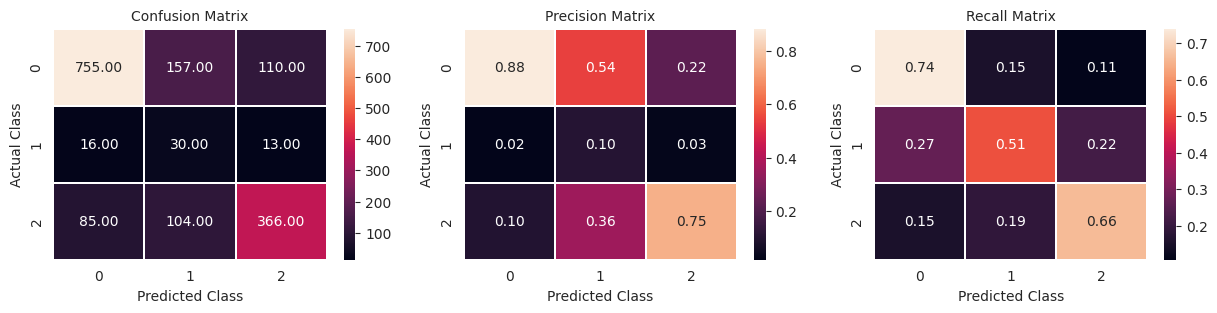


               precision    recall  f1-score   support

           0       0.88      0.74      0.80      1022
           1       0.10      0.51      0.17        59
           2       0.75      0.66      0.70       555

    accuracy                           0.70      1636
   macro avg       0.58      0.64      0.56      1636
weighted avg       0.81      0.70      0.75      1636

y_hat shape:(5271, 3)
Test log_loss: 0.8%

Running CV 34

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 7s 22ms/step - loss: 1.5148 - auc_49: 0.5307 - val_loss: 0.9035 - val_auc_49: 0.6605 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 23ms/step - loss: 1.2689 - auc_49: 0.6096 - val_loss: 0.8293 - val_auc_49: 0.6984 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 24ms/step - loss: 1.1182 - auc_49: 0.6276 - val_loss: 0.8309 - val_auc_49: 0.7576 - lr: 5.0000e-04
Epoch 4/200
205/205 [===========

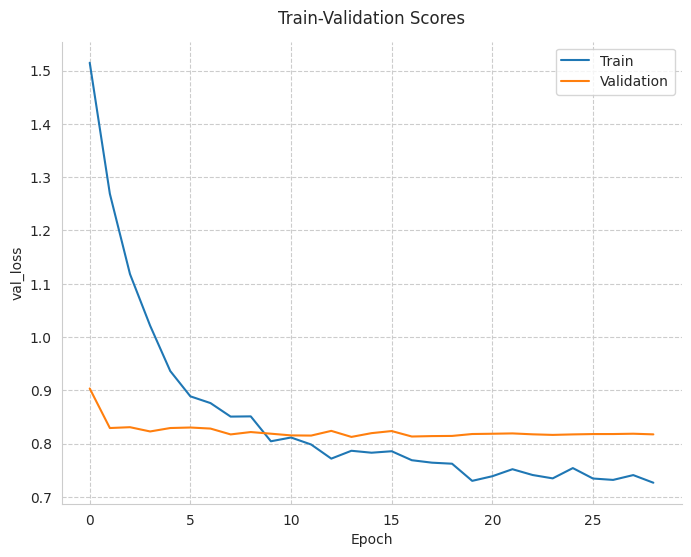

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


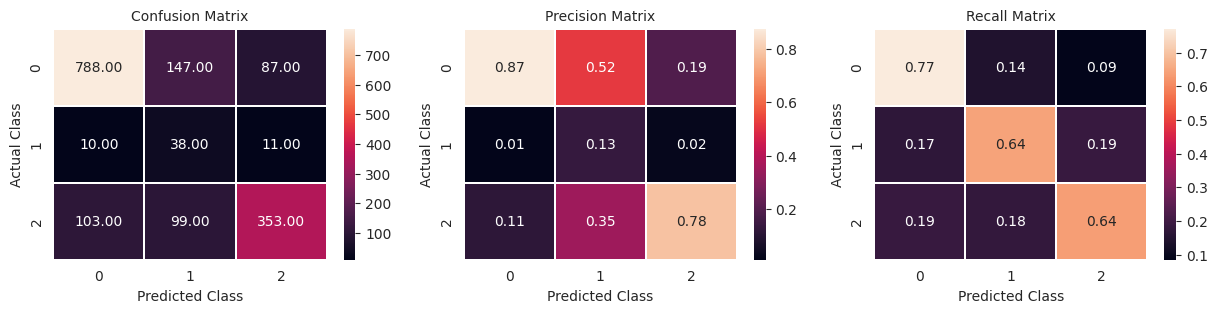


               precision    recall  f1-score   support

           0       0.87      0.77      0.82      1022
           1       0.13      0.64      0.22        59
           2       0.78      0.64      0.70       555

    accuracy                           0.72      1636
   macro avg       0.60      0.68      0.58      1636
weighted avg       0.82      0.72      0.76      1636

y_hat shape:(5271, 3)
Test log_loss: 0.81%

Running CV 35

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 9s 29ms/step - loss: 1.4748 - auc_50: 0.5158 - val_loss: 1.0238 - val_auc_50: 0.4027 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 22ms/step - loss: 1.2222 - auc_50: 0.5892 - val_loss: 0.9181 - val_auc_50: 0.6683 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 26ms/step - loss: 1.0782 - auc_50: 0.6402 - val_loss: 0.8523 - val_auc_50: 0.7617 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

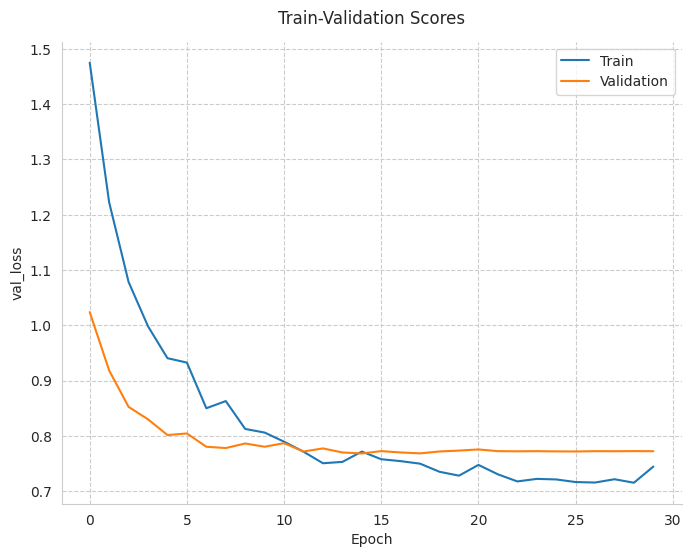

52/52 [==============================] - 1s 6ms/step
(1637,) (1637, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


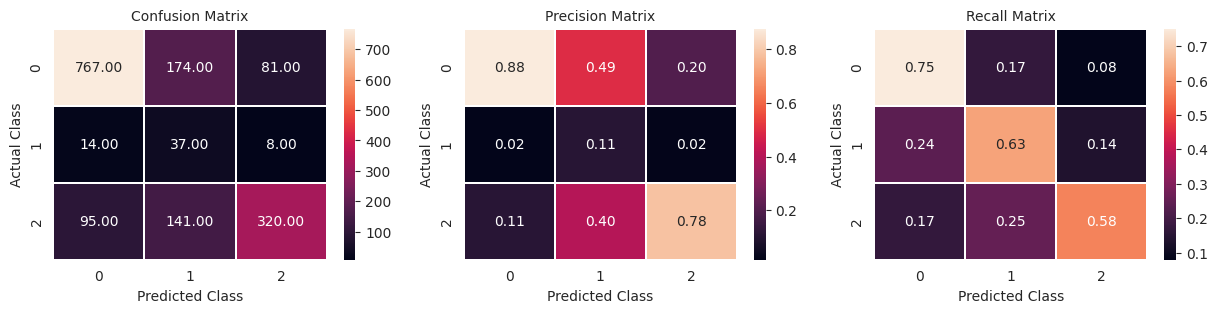


               precision    recall  f1-score   support

           0       0.88      0.75      0.81      1022
           1       0.11      0.63      0.18        59
           2       0.78      0.58      0.66       556

    accuracy                           0.69      1637
   macro avg       0.59      0.65      0.55      1637
weighted avg       0.82      0.69      0.74      1637

y_hat shape:(5271, 3)
Test log_loss: 0.77%

Running CV 36

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 8s 26ms/step - loss: 1.4514 - auc_51: 0.5423 - val_loss: 0.8913 - val_auc_51: 0.5448 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 26ms/step - loss: 1.2340 - auc_51: 0.6010 - val_loss: 0.7327 - val_auc_51: 0.7444 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 26ms/step - loss: 1.0851 - auc_51: 0.6285 - val_loss: 0.7128 - val_auc_51: 0.7561 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

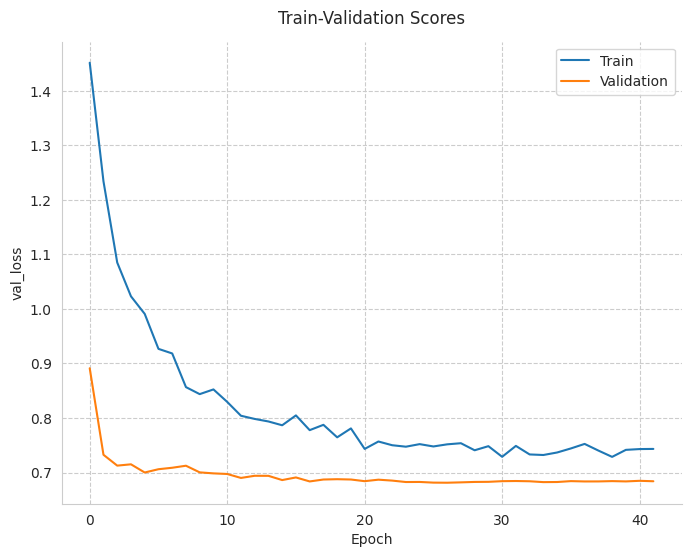

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


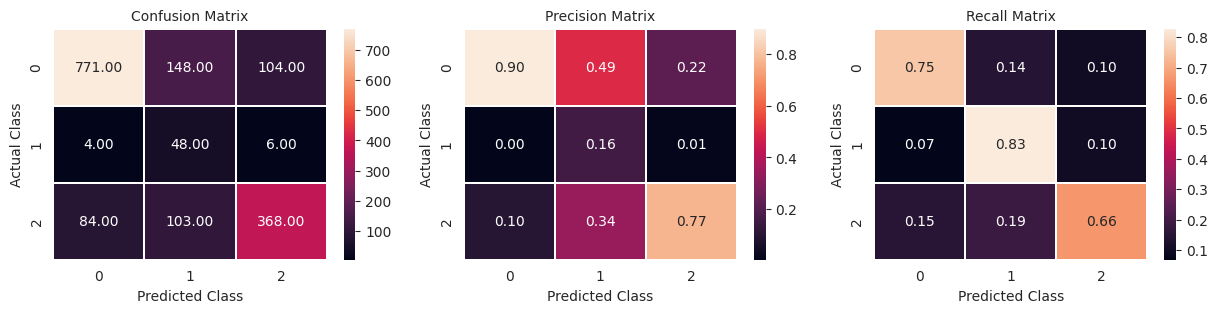


               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1023
           1       0.16      0.83      0.27        58
           2       0.77      0.66      0.71       555

    accuracy                           0.73      1636
   macro avg       0.61      0.75      0.60      1636
weighted avg       0.83      0.73      0.76      1636

y_hat shape:(5271, 3)
Test log_loss: 0.68%

Running CV 37

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 9s 27ms/step - loss: 1.4842 - auc_52: 0.5176 - val_loss: 0.8527 - val_auc_52: 0.8002 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 23ms/step - loss: 1.2294 - auc_52: 0.5989 - val_loss: 0.7852 - val_auc_52: 0.7945 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 23ms/step - loss: 1.0821 - auc_52: 0.6496 - val_loss: 0.8009 - val_auc_52: 0.7975 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

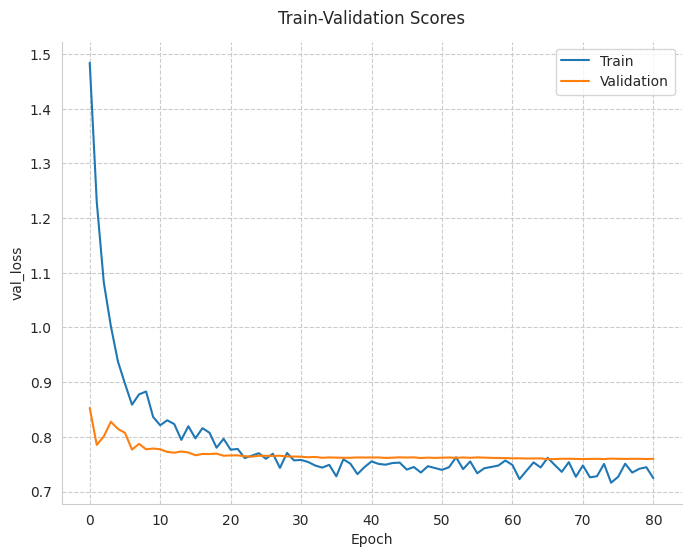

52/52 [==============================] - 1s 7ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


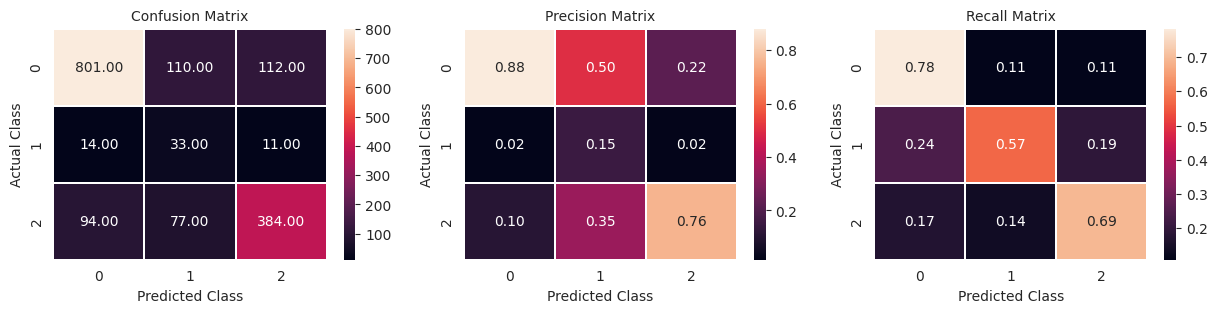


               precision    recall  f1-score   support

           0       0.88      0.78      0.83      1023
           1       0.15      0.57      0.24        58
           2       0.76      0.69      0.72       555

    accuracy                           0.74      1636
   macro avg       0.60      0.68      0.60      1636
weighted avg       0.81      0.74      0.77      1636

y_hat shape:(5271, 3)
Test log_loss: 0.76%

Running CV 38

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 12s 26ms/step - loss: 1.4665 - auc_53: 0.5340 - val_loss: 0.9351 - val_auc_53: 0.6154 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 6s 26ms/step - loss: 1.1897 - auc_53: 0.6254 - val_loss: 0.8094 - val_auc_53: 0.7679 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 23ms/step - loss: 1.0745 - auc_53: 0.6415 - val_loss: 0.8008 - val_auc_53: 0.7592 - lr: 5.0000e-04
Epoch 4/200
205/205 [=========

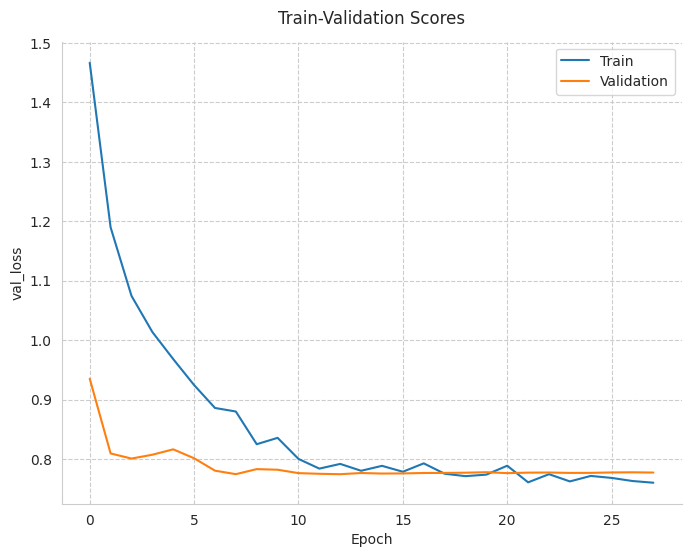

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


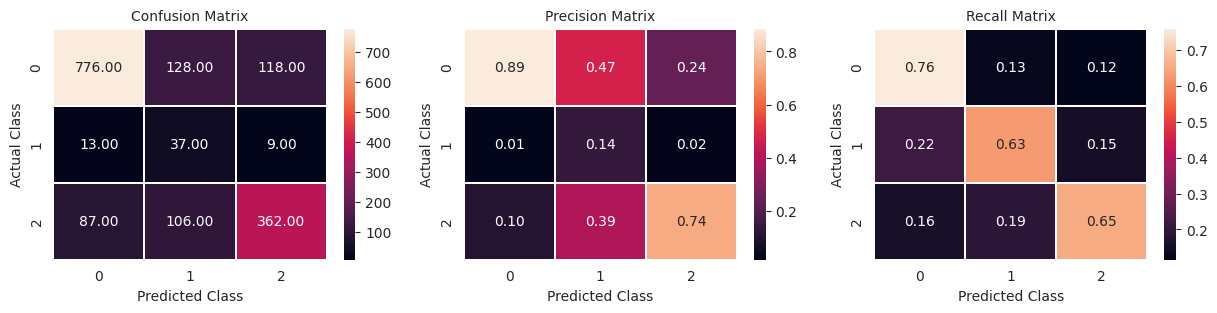


               precision    recall  f1-score   support

           0       0.89      0.76      0.82      1022
           1       0.14      0.63      0.22        59
           2       0.74      0.65      0.69       555

    accuracy                           0.72      1636
   macro avg       0.59      0.68      0.58      1636
weighted avg       0.81      0.72      0.75      1636

y_hat shape:(5271, 3)
Test log_loss: 0.77%

Running CV 39

Adapting Features Space....
Start training the model...
Epoch 1/200
205/205 [==============================] - 9s 28ms/step - loss: 1.4485 - auc_54: 0.5226 - val_loss: 0.8673 - val_auc_54: 0.6015 - lr: 5.0000e-04
Epoch 2/200
205/205 [==============================] - 5s 23ms/step - loss: 1.2259 - auc_54: 0.6051 - val_loss: 0.7740 - val_auc_54: 0.7353 - lr: 5.0000e-04
Epoch 3/200
205/205 [==============================] - 5s 26ms/step - loss: 1.1051 - auc_54: 0.6412 - val_loss: 0.7667 - val_auc_54: 0.7424 - lr: 5.0000e-04
Epoch 4/200
205/205 [==========

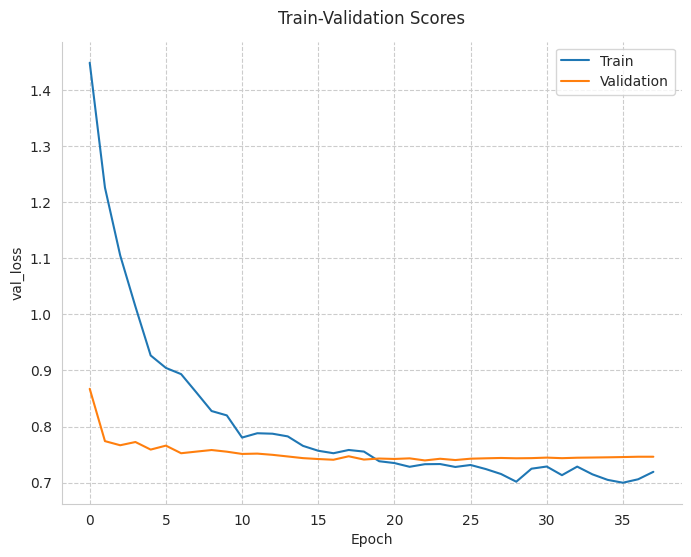

52/52 [==============================] - 1s 6ms/step
(1636,) (1636, 1)
Column sum of precision matrix: [1. 1. 1.]
Row sum of recall matrix:       [1. 1. 1.]


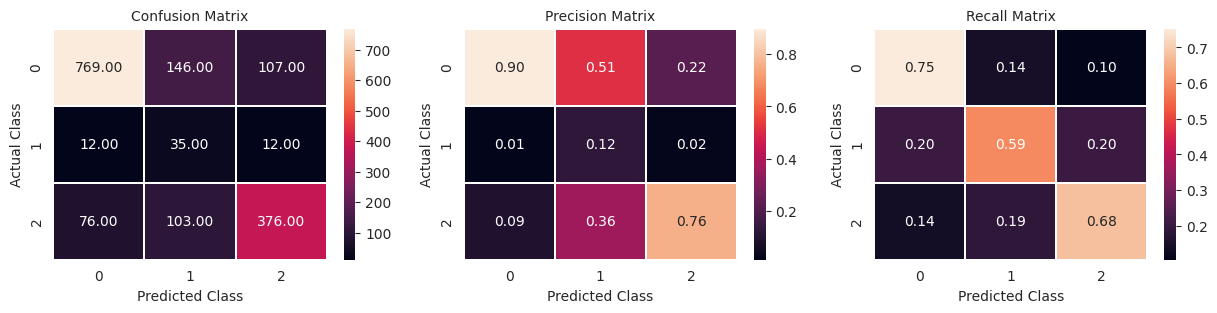


               precision    recall  f1-score   support

           0       0.90      0.75      0.82      1022
           1       0.12      0.59      0.20        59
           2       0.76      0.68      0.72       555

    accuracy                           0.72      1636
   macro avg       0.59      0.67      0.58      1636
weighted avg       0.82      0.72      0.76      1636

y_hat shape:(5271, 3)
Test log_loss: 0.74%
All Valuation AUC_pr: 0.7864471673965454


In [ ]:
test_results_df_C,test_results_df_CL,test_results_df_D, test_results_df = run_experiment(X_train,
                                                                                         X_test,
                                                                                         input_format="concat",
                                                                                         experiment_name="model_baseline_ext_v0",
                                                                                         splits=5, num_epochs=200,
                                                                                         batch_size=32)

In [ ]:
test_results_df

C        CL         D
0     0.462283  0.189069  0.348649
1     0.559173  0.326514  0.114313
2     0.079560  0.288858  0.631583
3     0.770235  0.163474  0.066291
4     0.399796  0.310902  0.289302
...        ...       ...       ...
5266  0.418146  0.414421  0.167434
5267  0.739137  0.164190  0.096673
5268  0.663485  0.101174  0.235341
5269  0.673930  0.301251  0.024819
5270  0.279070  0.073565  0.647364

[5271 rows x 3 columns]

In [ ]:
test_results_df.to_csv("Baseline_v0.csv")

### 6.2 Baseline OverSampling

**Oversample the minority class**

A related approach would be to resample the dataset by oversampling the minority class.

In [178]:
X_train = pd.read_csv("new_train.csv", index_col=0)
X_test = pd.read_csv("new_test.csv", index_col=0)

#X_train["weights"] = X_train["Status"]
#X_test["weights"] = 1.0

strat_feature = X_train["Status"]

X_train.drop(columns=["id","Status","min_class_feat_RF"],inplace=True)
X_test.drop(columns=["id","Status","min_class_feat_RF"],inplace=True)

num_var = X_train.select_dtypes("float").columns
cat_var = X_train.select_dtypes("int").columns

X_train[num_var]=X_train[num_var].astype("float32")
X_train[cat_var]=X_train[cat_var].astype("int32")

X_test[num_var]=X_test[num_var].astype("float32")
X_test[cat_var]=X_test[cat_var].astype("int32")

X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8181 entries, 0 to 311
Data columns (total 39 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   Drug                            8181 non-null   int32  
 1   Sex                             8181 non-null   int32  
 2   Ascites                         8181 non-null   int32  
 3   Hepatomegaly                    8181 non-null   int32  
 4   Spiders                         8181 non-null   int32  
 5   Edema                           8181 non-null   int32  
 6   Bilirubin                       8181 non-null   float32
 7   Cholesterol                     8181 non-null   float32
 8   Albumin                         8181 non-null   float32
 9   Copper                          8181 non-null   float32
 10  Alk_Phos                        8181 non-null   float32
 11  SGOT                            8181 non-null   float32
 12  Tryglicerides                   818

In [179]:
num_var = list(num_var)
cat_var = list(cat_var)
cat_var.remove('Status_C')
cat_var.remove('Status_CL')
cat_var.remove('Status_D')

In [180]:
C_instances = X_train[X_train.Status_C==1]
CL_instances = X_train[X_train.Status_CL==1]
D_instances = X_train[X_train.Status_D==1]

In [181]:
C_instances.shape, CL_instances.shape, D_instances.shape

((5112, 39), (293, 39), (2776, 39))

**TEST NEW DATASET MANAGER**

In [182]:
def dataframe_to_dataset_class(dataframe, shuffle=False, batch_size=32,buffer_size=6_000):
    dataframe = dataframe.copy()
    labels = dataframe[["Status_C","Status_CL","Status_D"]]
    dataframe = dataframe.drop(columns=["Status_C","Status_CL","Status_D"])
    #weights = dataframe.pop("weights")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
      ds = ds.shuffle(buffer_size=buffer_size).repeat()
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

def dataframe_to_dataset(dataframe, shuffle=False, batch_size=32):
    dataframe = dataframe.copy()
    labels = dataframe[["Status_C","Status_CL","Status_D"]]
    dataframe = dataframe.drop(columns=["Status_C","Status_CL","Status_D"])
    #weights = dataframe.pop("weights")
    ds = tf.data.Dataset.from_tensor_slices((dict(dataframe), labels))
    if shuffle:
      ds = ds.shuffle(buffer_size=len(dataframe))
    ds = ds.batch(batch_size)
    ds = ds.prefetch(batch_size)
    return ds

In [183]:
train_dataset = dataframe_to_dataset(X_train, batch_size=32, shuffle=True)
test_dataset = dataframe_to_dataset(X_test, batch_size=32, shuffle=False)

C_instances = X_train[X_train.Status_C==1]
CL_instances = X_train[X_train.Status_CL==1]
D_instances = X_train[X_train.Status_D==1]

C_dataset = dataframe_to_dataset_class(C_instances,batch_size=1, shuffle=True)
CL_dataset = dataframe_to_dataset_class(CL_instances,batch_size=1, shuffle=True)
D_dataset = dataframe_to_dataset_class(D_instances,batch_size=1, shuffle=True)


feature_space = FeatureSpace(
                            features={**{a:FeatureSpace.integer_categorical(num_oov_indices=1, output_mode="int") for a in cat_var},**{a:FeatureSpace.float_normalized() for a in num_var}},
                            # Specify feature cross with a custom crossing dim.
                            crosses=[FeatureSpace.cross(feature_names=("count_disease","bill_proh_binned"), crossing_dim=10, output_mode="int"),
                                     FeatureSpace.cross(feature_names=("Drug","Bilirubin_binned"), crossing_dim=5, output_mode="int")],
                            output_mode="dict"
                            )

train_ds_with_no_labels = train_dataset.map(lambda x, *_: x)
print("Adapting Features Space....")
feature_space.adapt(train_ds_with_no_labels)

preprocessed_train_ds = train_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
#preprocessed_valid_ds = valid_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_test_ds = test_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

preprocessed_train_C = C_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_train_CL = CL_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)
preprocessed_train_D = D_dataset.map(lambda x, y: (feature_space(x), y), num_parallel_calls=tf.data.AUTOTUNE).prefetch(tf.data.AUTOTUNE)

resampled_ds = tf.data.Dataset.sample_from_datasets([preprocessed_train_C, preprocessed_train_CL, preprocessed_train_D], weights=[0.334, 0.333, 0.333])
resampled_ds = resampled_ds.batch(batch_size=32).prefetch(tf.data.AUTOTUNE)

print(".... and Done! And it worked ")

Adapting Features Space....
.... and Done! And it worked 


In [184]:
for features, label in resampled_ds.take(1):
  print(label.numpy().mean(axis=0))
  print(label.numpy().shape)
#  print(features.numpy().shape)

[[0.5    0.1875 0.3125]]
(32, 1, 3)


In [185]:
fs_trial = feature_space.get_encoded_features()
list_categorical_nn=[]
inputs = list(fs_trial.keys())

for key, item in fs_trial.items():
  if item.dtype=="int64":
    list_categorical_nn.append(key)

#print(list_categorical_nn)

Cat_Feat_Entries=dict()
embedding_dims=dict()

for f in list_categorical_nn[:-2]:
  Cat_Feat_Entries[f]=list(range(len(X_train[f].unique())))
  embedding_dims[f]=max(int(np.ceil(len(X_train[f].unique())/2)),2)

Cat_Feat_Entries['Drug_X_Bilirubin_binned'] = list(range(10))
Cat_Feat_Entries['count_disease_X_bill_proh_binned'] = list(range(5))

embedding_dims['Drug_X_Bilirubin_binned'] = 6
embedding_dims['count_disease_X_bill_proh_binned'] = 3

In [186]:
def encode_inputs_v0(inputs, edense=4, num_dense_exp=True, list_categorical_nn=list_categorical_nn, Cat_Feat_Entries=Cat_Feat_Entries, embedding_dims_det=None, name="enc"):
    encoded_categorical_feature_list = []
    numerical_feature_list = []

    for feature_name in inputs:
        if feature_name in list_categorical_nn:

          vocabulary = Cat_Feat_Entries[feature_name]

          if embedding_dims_det is not None:
            ed = embedding_dims_det[feature_name]
          else:
            ed = edense

          embedding = layers.Embedding(input_dim=len(vocabulary), output_dim=ed)
          # Convert the index values to embedding representations.
          encoded_categorical_feature = embedding(inputs[feature_name])
          encoded_categorical_feature = tf.keras.layers.Dense(edense, name=f"cat_dense_{feature_name}_{name}")(encoded_categorical_feature)
          encoded_categorical_feature = keras.layers.Reshape((edense,), name=f"cat_reshape_{feature_name}_{name}")(encoded_categorical_feature)
          encoded_categorical_feature_list.append(encoded_categorical_feature)

        else:
          # Use the numerical features as-is.
          numerical_feature = inputs[feature_name] #tf.expand_dims(inputs[feature_name], -1)

          if num_dense_exp:
            numerical_feature = tf.keras.layers.Dense(edense, name=f"num_dense_{feature_name}_{name}")(numerical_feature)

          numerical_feature_list.append(numerical_feature)

    return encoded_categorical_feature_list, numerical_feature_list

In [195]:
def create_DW_model(fs, name="deepwide_model",learning_rate = 0.001,
                    activation="relu",gn_noise=0.01,dropout=0.5,hidden_layers=3,
                    units_0=256,units_1=256):

  encoded_features = fs.get_encoded_features()
  # Wide Leg
  cat,num = encode_inputs_v0(encoded_features, edense=4, embedding_dims_det=embedding_dims, name="enc_wide")
  wide_cat = tf.keras.layers.concatenate(cat, name="wide_cat_concat")
  wide_num = tf.keras.layers.concatenate(num, name="wide_num_concat")
  wide = tf.keras.layers.concatenate([wide_cat,wide_num], name="wide_concat")
  wide = layers.BatchNormalization(name="wide_norm")(wide)
  # Deep Leg
  cat_deep,num_deep = encode_inputs_v0(encoded_features, edense=4, embedding_dims_det=embedding_dims, name="enc_deep")
  deep_cat = tf.keras.layers.concatenate(cat_deep, name="deep_cat_concat")
  deep_num = tf.keras.layers.concatenate(num_deep, name="deep_num_concat")
  deep = tf.keras.layers.concatenate([deep_cat,deep_num], name="deep_concat")

  deep = tf.keras.layers.GaussianNoise(stddev=gn_noise, name="gsn")(deep)

  for layer_ in range(hidden_layers):

      deep = dense_residual_block(units_0, dropout_rate=0.25, activation="relu", kr=0, attention=False, name=f"drb_{layer_}")(deep)

  x = tf.keras.layers.concatenate([deep,wide], name = "final_concat")

  output = tf.keras.layers.Dense(3, activation="softmax", name="output_layer")(x)


  model = keras.Model(inputs=encoded_features, outputs=output)

  model.compile(
          optimizer=keras.optimizers.Adam(learning_rate=learning_rate),
          loss=tf.keras.losses.CategoricalCrossentropy(name="cat_ce"),
          metrics=[keras.metrics.AUC(curve="PR", name="auc_pr")]
          )

  return model

In [196]:
model = create_DW_model(feature_space)
model.summary()

Model: "model_13"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_419 (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 input_421 (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 input_423 (InputLayer)      [(None, 1)]                  0         []                            
                                                                                                  
 input_424 (InputLayer)      [(None, 1)]                  0         []                            
                                                                                           

In [198]:
keras.utils.plot_model(model, show_shapes=True,rankdir="LR", expand_nested=True)